# Temat testów

1. Całkowity czas fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w całkowitym czasie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w całkowitym czasie fiksacji/wizyt między grupami grafik A i B.

2. Średni czas fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w średnim czasie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w średnim czasie fiksacji/wizyt między grupami grafik A i B.

3. Liczba fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w liczbie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w liczbie fiksacji/wizyt między grupami grafik A i B.

Poziom istotności: $\alpha=0.05$

In [1]:
import pandas as pd
from functions.tests.dependent_groups import ttest_or_wilcoxon
from functions.plots import plot_two_density, plot_two_boxplots

In [2]:
names_sum = {1: 'Zsumowane_grafiki_A_z_poleceniem',
             2: 'Zsumowane_grafiki_A_bez_polecenia',
             3: 'Zsumowane_grafiki_A_tylko_polecenie',
             4: 'Zsumowane_grafiki_B_z_poleceniem',
             5: 'Zsumowane_grafiki_B_bez_polecenia',
             6: 'Zsumowane_grafiki_B_tylko_polecenie'}

names_coll = {1: 'Kolekcja_grafiki_A_z_poleceniem',
              2: 'Kolekcja_grafiki_A_bez_polecenia',
              3: 'Kolekcja_grafiki_A_tylko_polecenie',
              4: 'Kolekcja_grafiki_B_z_poleceniem',
              5: 'Kolekcja_grafiki_B_bez_polecenia',
              6: 'Kolekcja_grafiki_B_tylko_polecenie'}

names_samples = {
    1: '1a',
    2: '1b',
    3: '2a',
    4: '2b',
    5: '3a',
    6: '3b',
}

path = '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/'

# fiksacje
df_sumA_withCom_f, df_sumA_withoutCom_f, df_sumA_onlyCom_f, df_sumB_withCom_f, df_sumB_withoutCom_f, df_sumB_onlyCom_f = [pd.read_csv(f'{path}fixation/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_collA_withCom_f, df_collA_withoutCom_f, df_collA_onlyCom_f, df_collB_withCom_f, df_collB_withoutCom_f, df_collB_onlyCom_f = [pd.read_csv(f'{path}fixation/dfs_coll_{name}.csv') for _, name in names_coll.items()]

df_1a_f, df_1b_f, df_2a_f, df_2b_f, df_3a_f, df_3b_f  = [pd.read_csv(f'{path}fixation/dfs_samples_{name}.csv', index_col='ID').drop(columns=['Avg_pupil_map', 'Avg_pupil_com']) for _, name in names_samples.items()]

for df in [df_1b_f, df_2b_f, df_3b_f]:
    df.drop(columns=['Avg_pupil_plt', 'Avg_pupil_txt', 'Avg_pupil_tab'], inplace=True)

# wizyty
df_sumA_withCom_v, df_sumA_withoutCom_v, df_sumA_onlyCom_v, df_sumB_withCom_v, df_sumB_withoutCom_v, df_sumB_onlyCom_v = [pd.read_csv(f'{path}visit/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_collA_withCom_v, df_collA_withoutCom_v, df_collA_onlyCom_v, df_collB_withCom_v, df_collB_withoutCom_v, df_collB_onlyCom_v = [pd.read_csv(f'{path}visit/dfs_coll_{name}.csv') for _, name in names_coll.items()]

df_1a_v, df_1b_v, df_2a_v, df_2b_v, df_3a_v, df_3b_v = [pd.read_csv(f'{path}visit/dfs_samples_{name}.csv', index_col='ID') for _, name in names_samples.items()]

In [3]:
def create_set_for_a_samples(df):
    total_with_com = df.filter(regex='Total').sum(axis=1)
    total_without_com = df.filter(regex='^Total_(?!com)').sum(axis=1)
    total_only_com  = df['Total_com']
    
    avg_with_com = df.filter(regex='Avg').sum(axis=1)
    avg_without_com = df.filter(regex='^Avg_(?!com)').sum(axis=1)
    avg_only_com  = df['Avg_com']

    num_with_com = df.filter(regex='Num').sum(axis=1)
    num_without_com = df.filter(regex='^Num_(?!com)').sum(axis=1)
    num_only_com  = df['Num_com']
    return pd.DataFrame(data={'Total_with_com': total_with_com, 'Total_without_com': total_without_com, 'Total_only_com': total_only_com, 'Avg_with_com': avg_with_com, 'Avg_without_com': avg_without_com, 'Avg_only_com': avg_only_com, 'Num_with_com': num_with_com, 'Num_without_com': num_without_com, 'Num_only_com': num_only_com})

In [4]:
df_1a_f = create_set_for_a_samples(df_1a_f)
df_2a_f = create_set_for_a_samples(df_2a_f)
df_3a_f = create_set_for_a_samples(df_3a_f)

df_1b_f = create_set_for_a_samples(df_1b_f)
df_2b_f = create_set_for_a_samples(df_2b_f)
df_3b_f = create_set_for_a_samples(df_3b_f)

df_1a_v = create_set_for_a_samples(df_1a_v)
df_2a_v = create_set_for_a_samples(df_2a_v)
df_3a_v = create_set_for_a_samples(df_3a_v)

df_1b_v = create_set_for_a_samples(df_1b_v)
df_2b_v = create_set_for_a_samples(df_2b_v)
df_3b_v = create_set_for_a_samples(df_3b_v)

In [5]:
ALPHA = 0.05

Całkowity czas fiksacji

In [6]:
# kolekcje A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1851.0
p-value: 3.198258683429981e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1939.0
p-value: 9.546500037739569e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2642.0
p-value: 0.01975477413178959
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [7]:
# sumy A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 109.0
p-value: 1.6715837773517706e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 123.0
p-value: 4.7302397433668375e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 230.0
p-value: 0.014677642795504653
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [8]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 325.0
p-value: 0.259140549798758
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 300.0
p-value: 0.1423485195809917
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 260.0
p-value: 0.07073200081922121
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 154.0
p-value: 0.0003571899414964719
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 152.0
p-value: 0.0003167852501064772
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality tes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Średni czas fiksacji

In [9]:
# kolekcje A vs B
var = 'Avg'
print('Z poleceniem:')
df = pd.DataFrame()
df['A'] = df_collA_withCom_f[var]
df['B'] = df_collB_withCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
df = pd.DataFrame()
df['A'] = df_collA_withoutCom_f[var]
df['B'] = df_collB_withoutCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
df = pd.DataFrame()
df['A'] = df_collA_onlyCom_f[var]
df['B'] = df_collB_onlyCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 4.0
p-value: 2.207304728476926e-21
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
120
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 5.108656794122169
p-value: 1.2497679619707794e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
110
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2724.5
p-value: 0.5039674795176932
Brak podstaw do odrzucenia H0.


In [10]:
# sumy A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 4.576269891255112
p-value: 4.7205928351513345e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 324.0
p-value: 0.25349167909553216
Brak podstaw do odrzucenia H0.


In [11]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3.0
p-value: 9.094947017729282e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
35
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -0.7087864105177738
p-value: 0.483288946090382
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Liczba fiksacji

In [12]:
# kolekcje A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1618.5
p-value: 1.3894285794914485e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1717.5
p-value: 5.516279833913876e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2347.0
p-value: 0.008538535719412307
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [13]:
# sumy A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 76.0
p-value: 9.583873179508373e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 92.0
p-value: 4.153314876020886e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 220.5
p-value: 0.009781997654499719
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [14]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 342.0
p-value: 0.36820016943056544
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 314.0
p-value: 0.20159339489509875
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 240.0
p-value: 0.059252827328658324
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 110.5
p-value: 1.805902866180986e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 99.5
p-value: 7.508137059630826e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Podsumowanie - fiksacje:
Istotne statystycznie:
- całkowita długość fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem i bez polecenia), 3 (wszystkie warianty)
- średnia długość fiksacji: kolekcje (z poleceniem, bez polecenia), sumy (z poleceniem, bez polecenia), 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia), 3 (z poleceniem, bez polecenia) 
- liczba fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem, bez polecenia), 3 (wszystkie warianty)

Całkowity czas wizyt

In [15]:
# kolekcje A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1901.0
p-value: 5.990757892998648e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1738.0
p-value: 7.285629882268982e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2729.5
p-value: 0.0360827096925918
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [16]:
# sumy A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 127.0
p-value: 6.268265497055836e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 101.0
p-value: 8.847995559335686e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 251.0
p-value: 0.03207873742940137
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [17]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 330.0
p-value: 0.28865784978552256
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 311.0
p-value: 0.18761708125202858
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 253.0
p-value: 0.056798634030622644
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 155.0
p-value: 0.0003790976079471875
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 142.0
p-value: 0.00017029843002092093
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normalit

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Średni czas wizyty

In [18]:
# kolekcje A vs B
var = 'Avg'
print('Z poleceniem:')
df = pd.DataFrame()
df['A'] = df_collA_withCom_v[var]
df['B'] = df_collB_withCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
df = pd.DataFrame()
df['A'] = df_collA_withoutCom_v[var]
df['B'] = df_collB_withoutCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
df = pd.DataFrame()
df['A'] = df_collA_onlyCom_v[var]
df['B'] = df_collB_onlyCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3576.0
p-value: 0.8885734772252507
Brak podstaw do odrzucenia H0.
Bez polecenia:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3393.0
p-value: 0.5356773768530547
Brak podstaw do odrzucenia H0.
Tylko polecenie:
110
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2969.0
p-value: 0.8044969185211371
Brak podstaw do odrzucenia H0.


In [19]:
# sumy A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.18549192680645915
p-value: 0.8538045773666763
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.8090215427684571
p-value: 0.4234110136533972
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 381.0
p-value: 0.7046876743079338
Brak podstaw do odrzucenia H0.


In [20]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 218.0
p-value: 0.00899504264089046
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 206.0
p-value: 0.005332173790520756
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
35
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 244.0
p-value: 0.2516415869467892
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 196.0
p-value: 0.0033575435081729665
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 181.0
p-value: 0.0015980837451934349
Istnieją podstawy do odr

Liczba wizyt

In [21]:
# kolekcje A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 59.5
p-value: 8.718388795044483e-21
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 945.0
p-value: 1.666912065521549e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1561.5
p-value: 3.382672792911207e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [22]:
# sumy A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 46.0
p-value: 3.480272425804287e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -4.11172119473331
p-value: 0.00019579937381779958
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [23]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 16.0
p-value: 3.0740920919924974e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 6.5
p-value: 8.946736354452664e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 205.5
p-value: 0.07221043294846406
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 4.0
p-value: 1.2732925824820995e-11
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning:

Podsumowanie - wizyty:
Istotne statystycznie:
- całkowita długość fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem i bez polecenia), 3 (z poleceniem i bez polecenia)
- średnia długość fiksacji: 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia)
- liczba fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia), 3 (wszystkie warianty)

Wykresy - fiksacje

TOTAL
Z poleceniem:


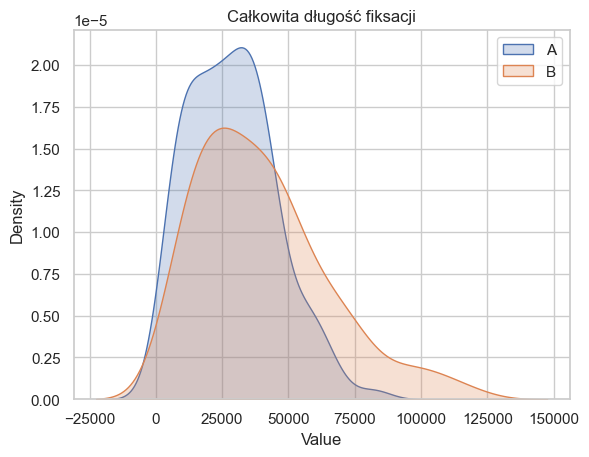

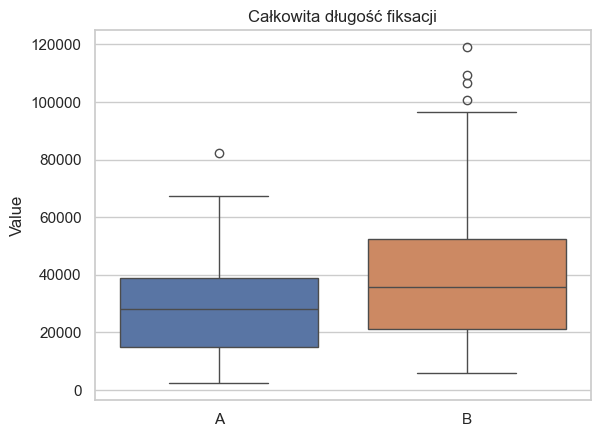

Bez polecenia:


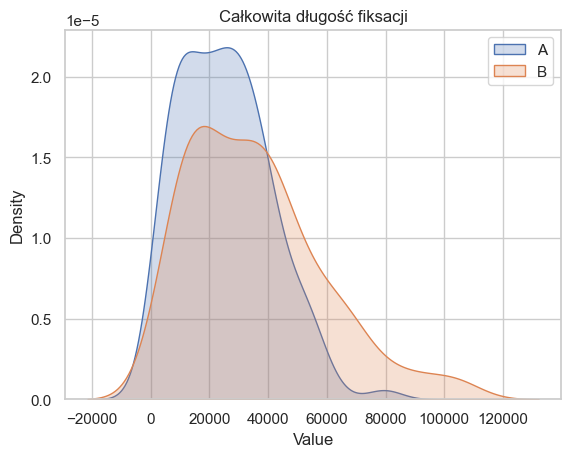

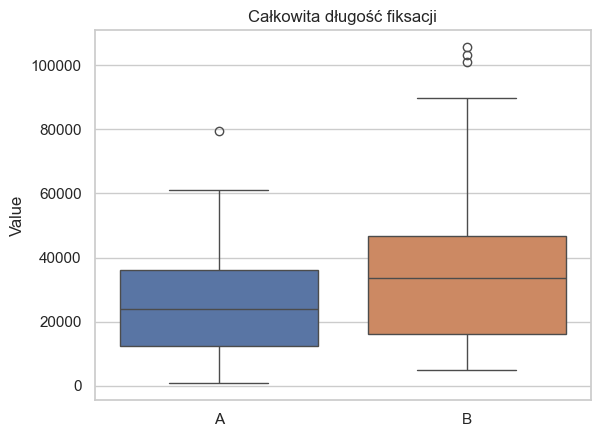

Tylko polecenie:


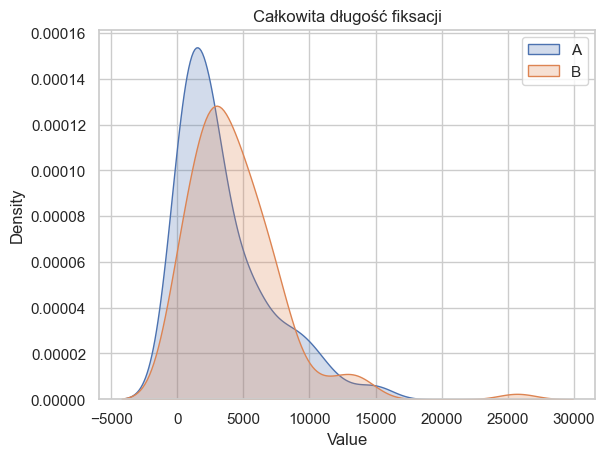

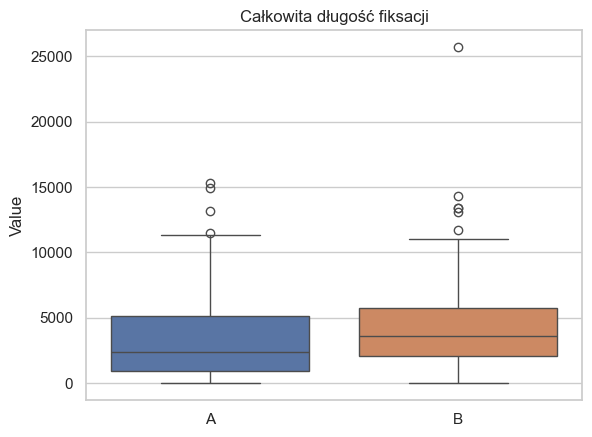

------------------------------------------
AVG
Z poleceniem:


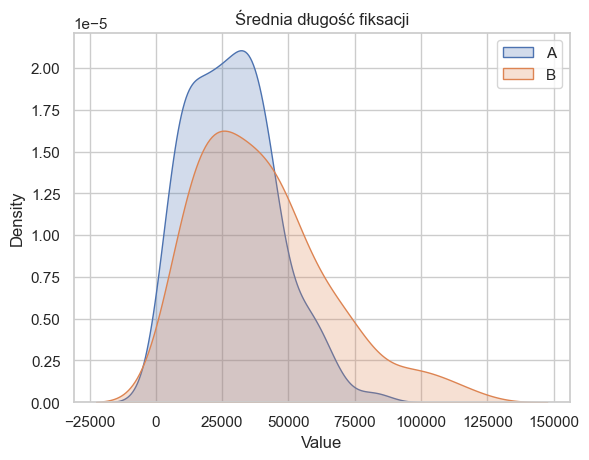

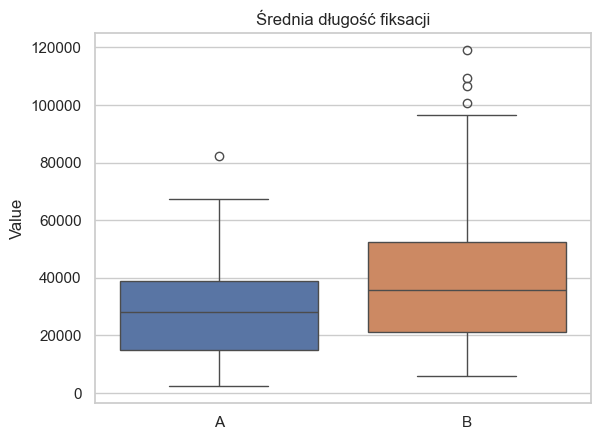

Bez polecenia:


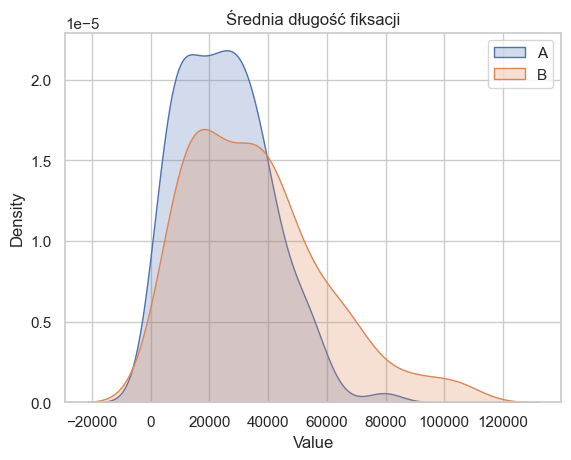

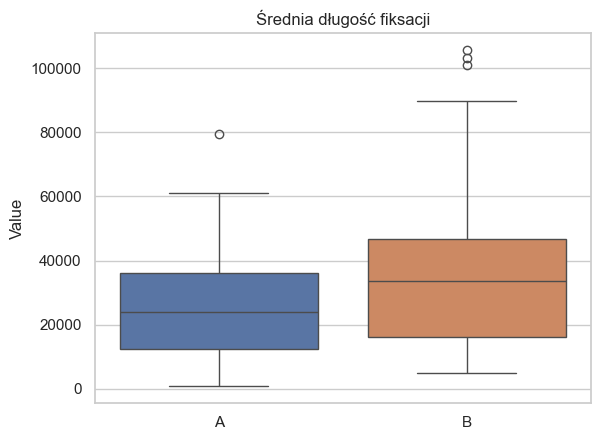

Tylko polecenie:


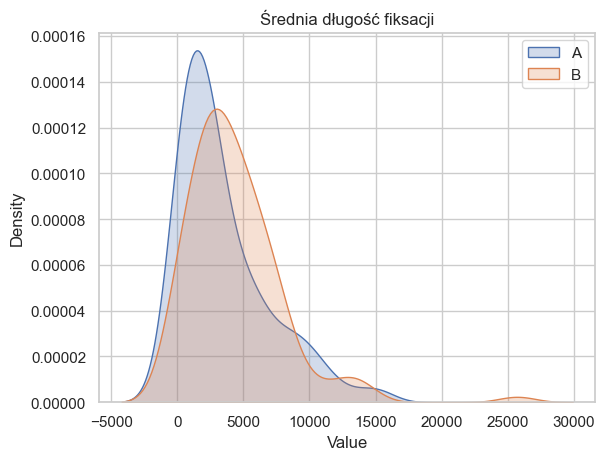

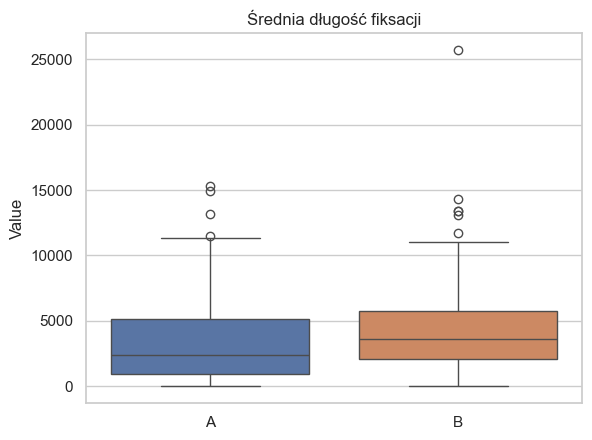

------------------------------------------
NUM
Z poleceniem:


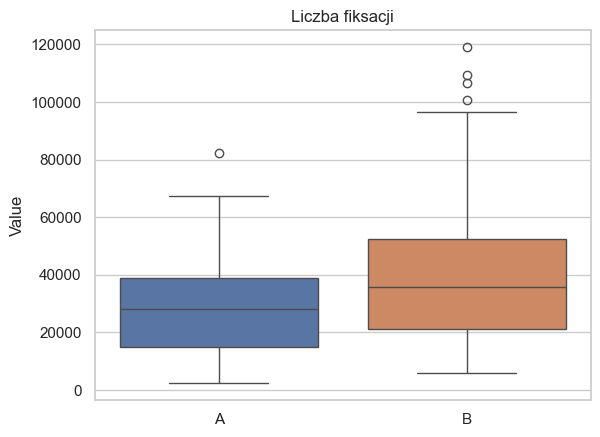

Bez polecenia:


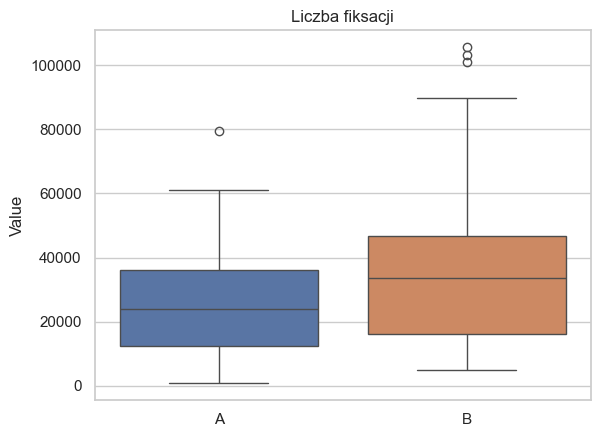

Tylko polecenie:


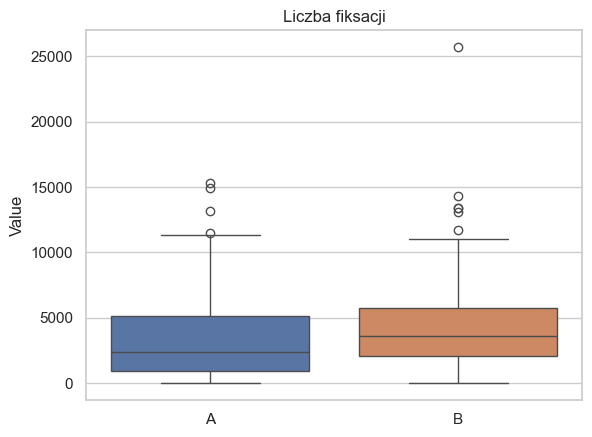

In [24]:
# kolekcje
var = 'Total'
title = 'Całkowita długość fiksacji'
print('TOTAL')
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
title = 'Średnia długość fiksacji'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
title = 'Liczba fiksacji'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

TOTAL
Z poleceniem:


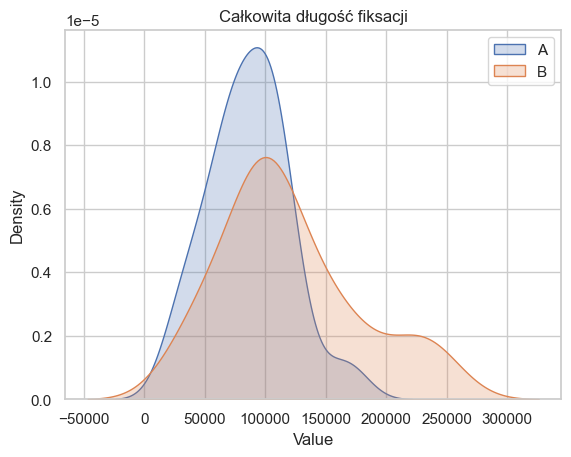

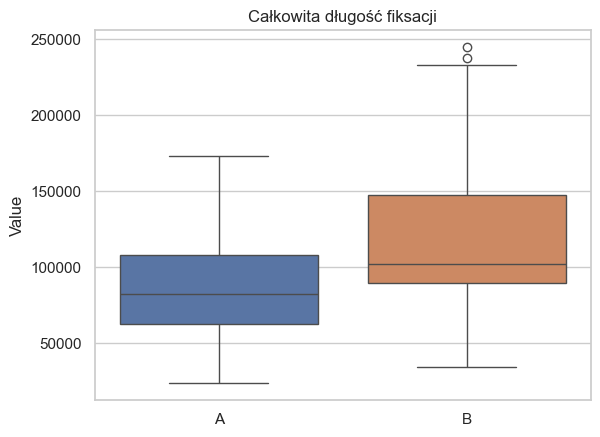

Bez polecenia:


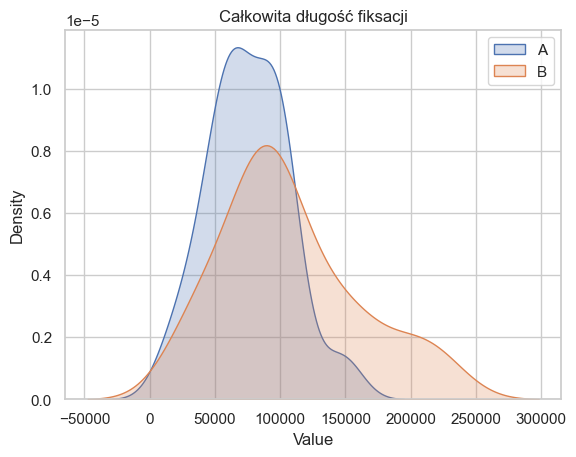

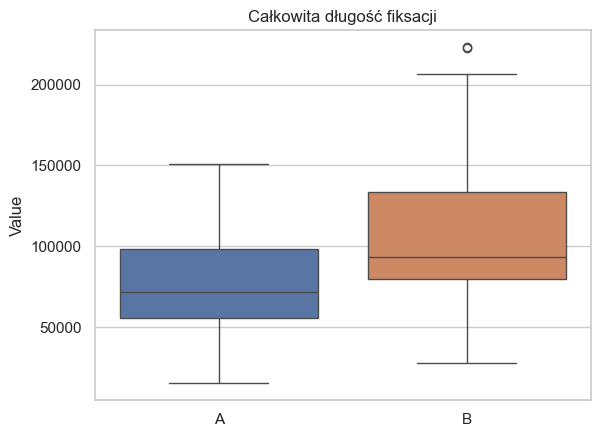

Tylko polecenie:


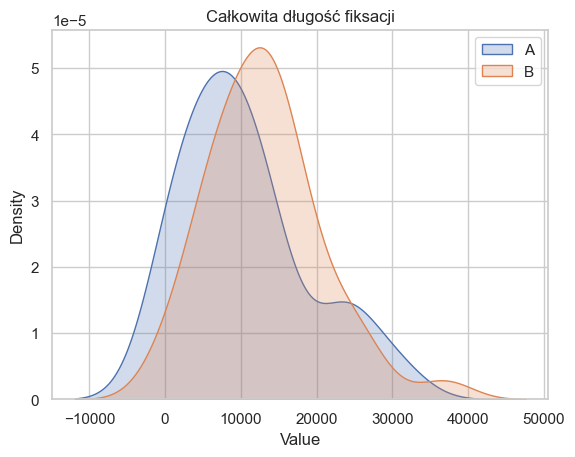

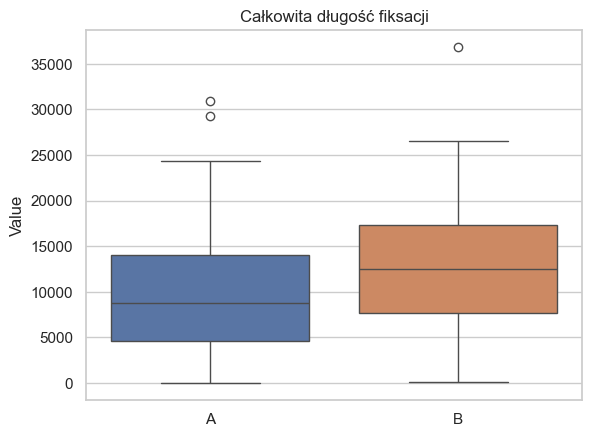

------------------------------------------
AVG
Z poleceniem:


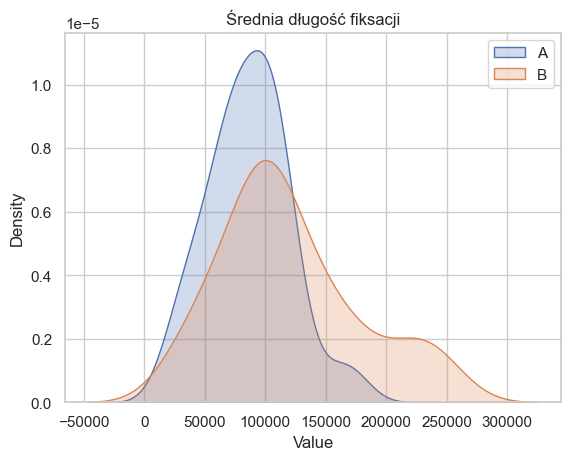

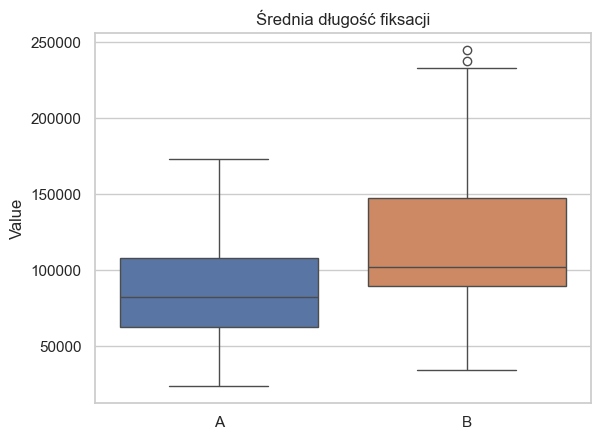

Bez polecenia:


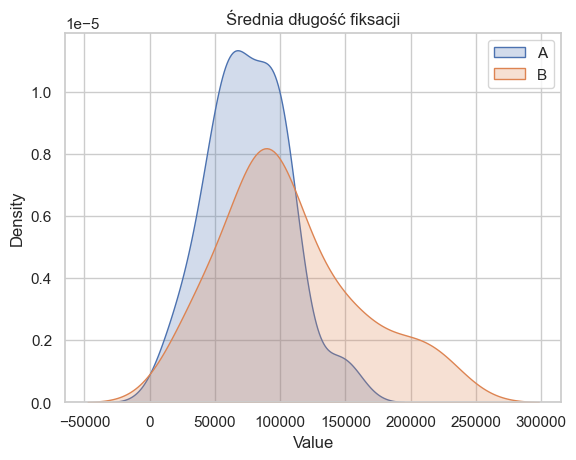

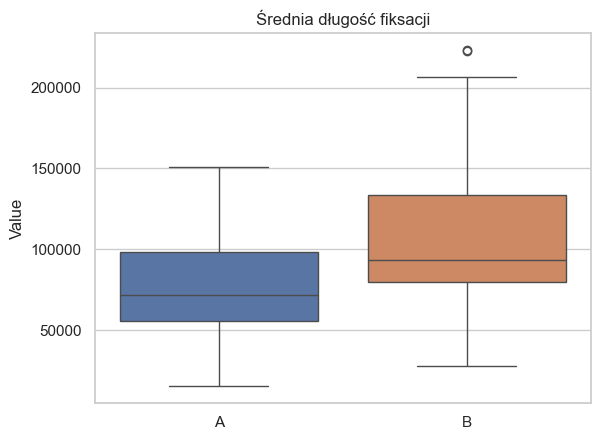

Tylko polecenie:


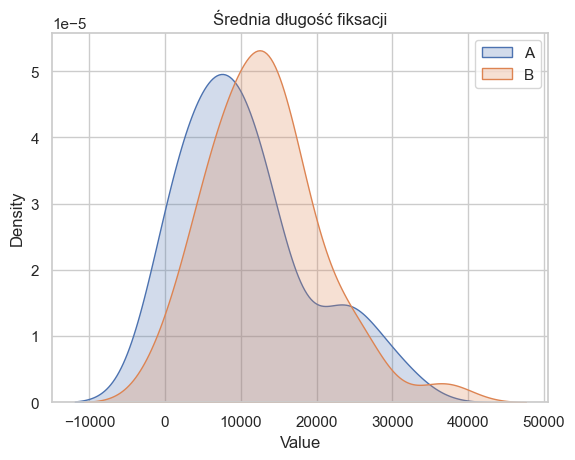

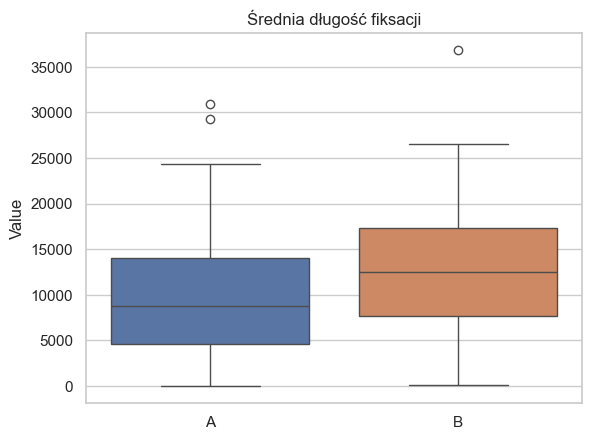

------------------------------------------
NUM
Z poleceniem:


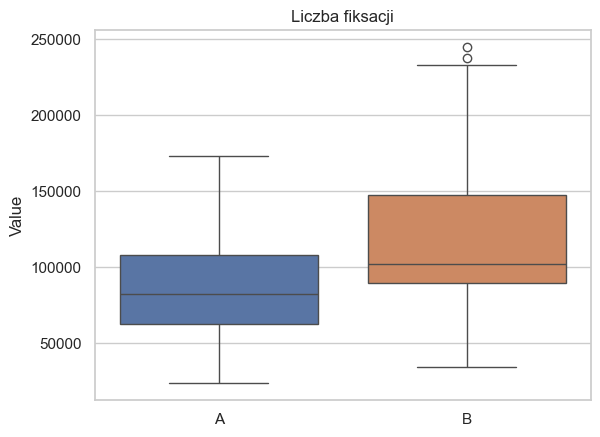

Bez polecenia:


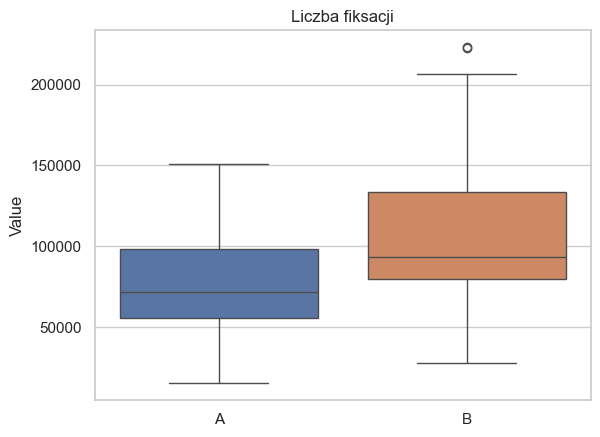

Tylko polecenie:


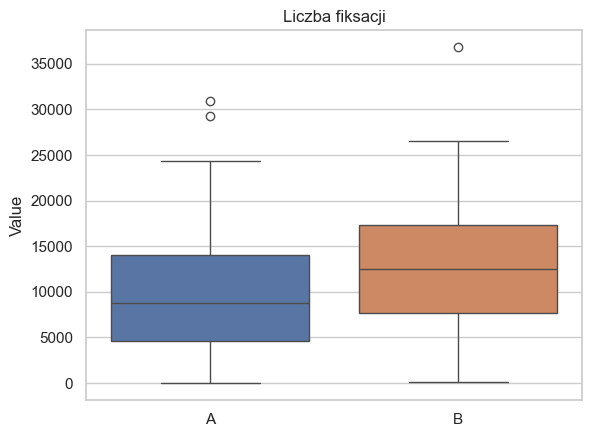

In [25]:
# sumy
var = 'Total'
title = 'Całkowita długość fiksacji'
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
title = 'Średnia długość fiksacji'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
title = 'Liczba fiksacji'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


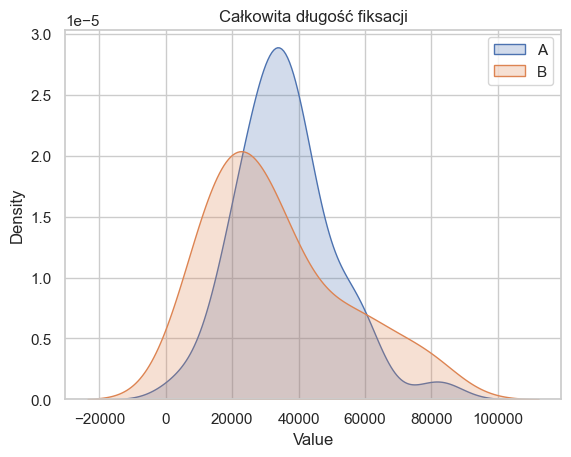

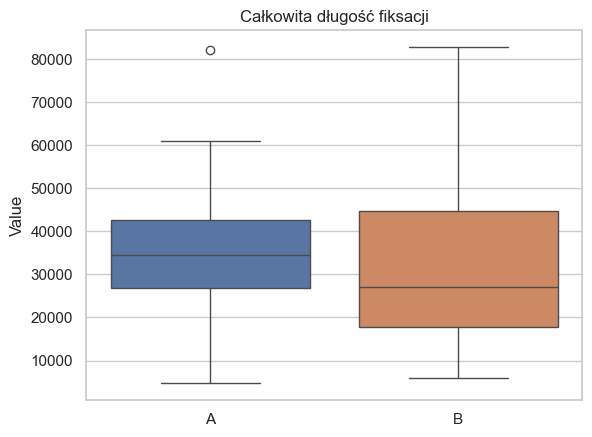

Bez polecenia:


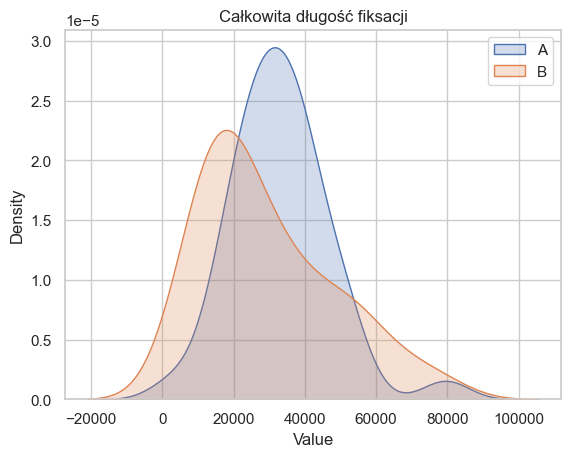

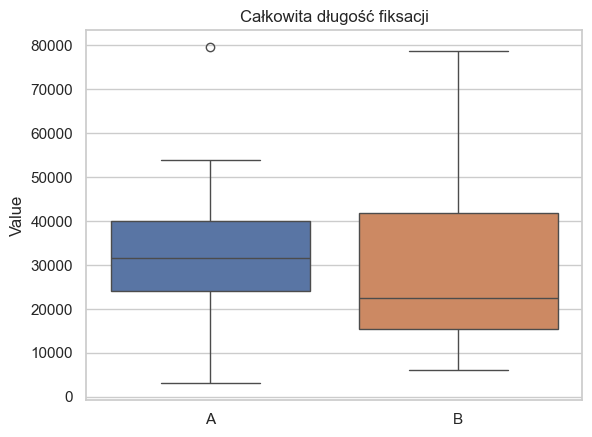

Tylko polecenie:


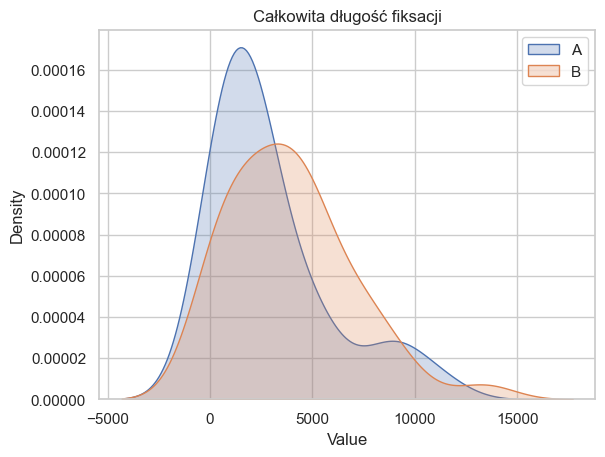

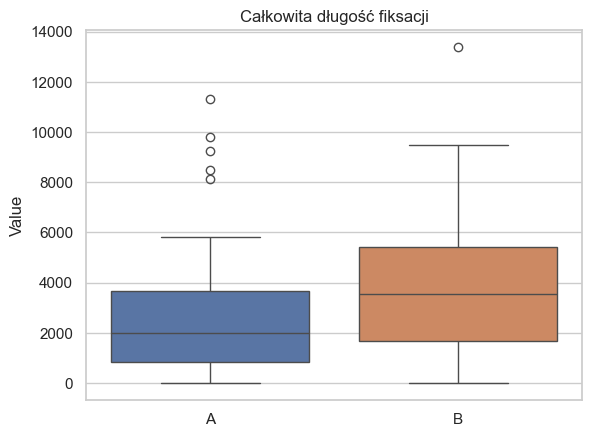

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


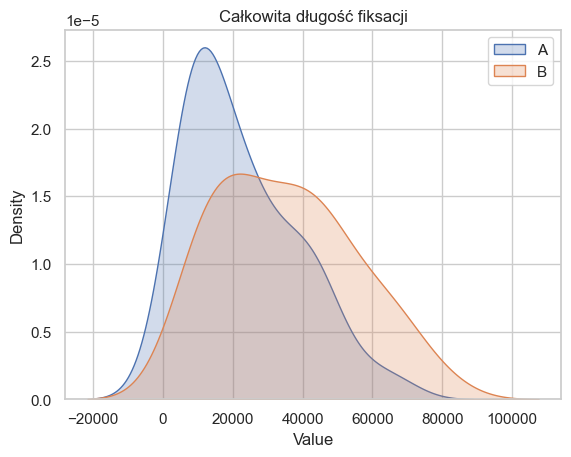

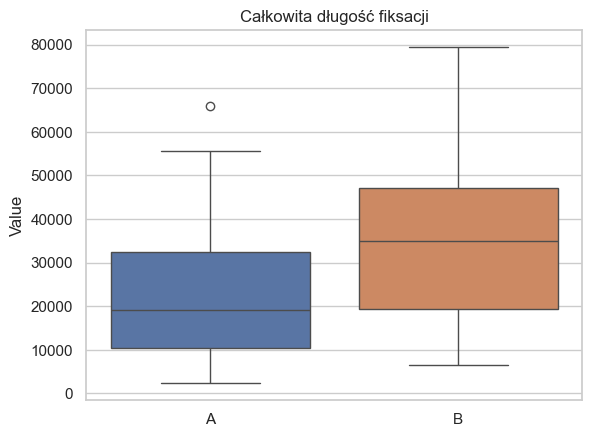

Bez polecenia:


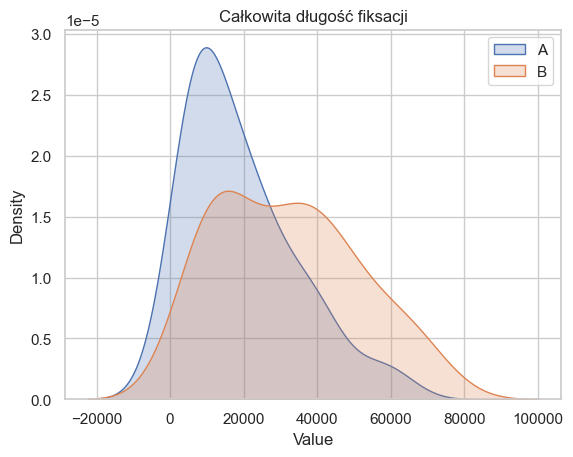

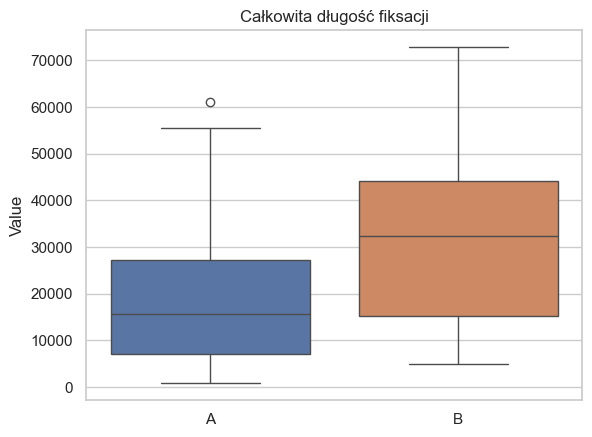

Tylko polecenie:


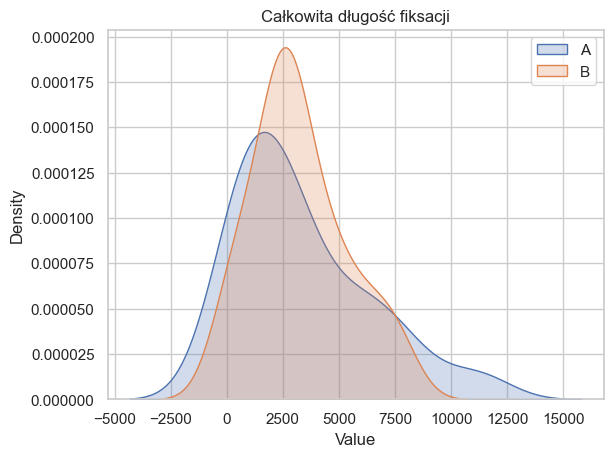

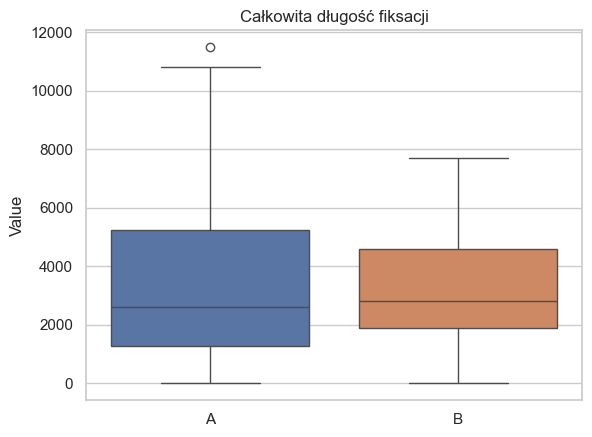

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


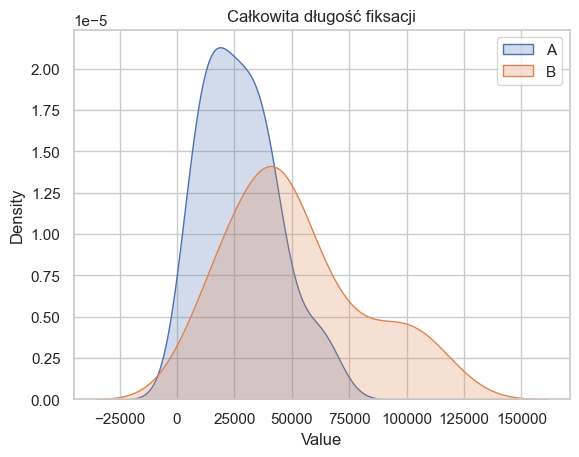

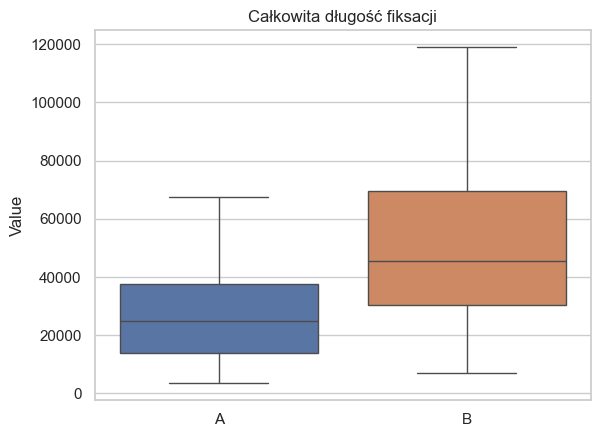

Bez polecenia:


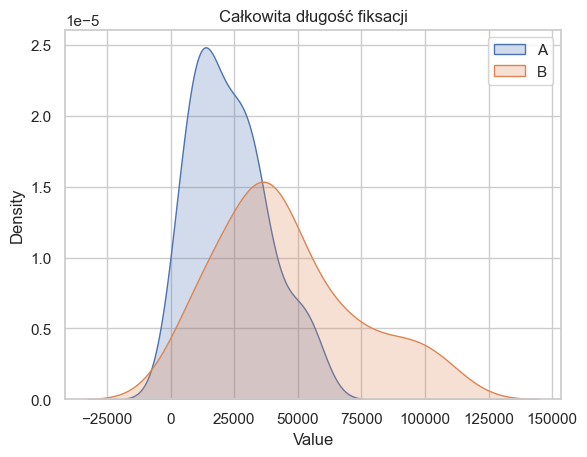

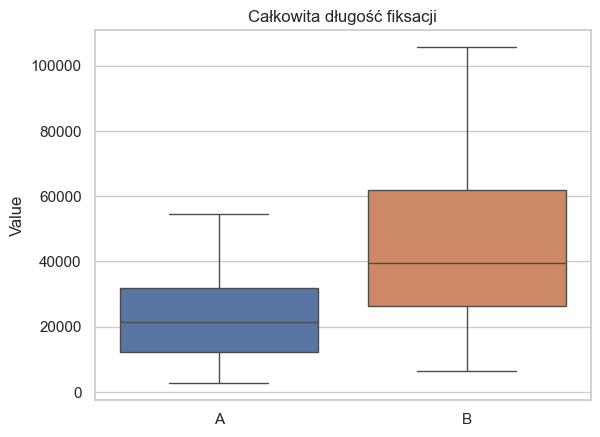

Tylko polecenie:


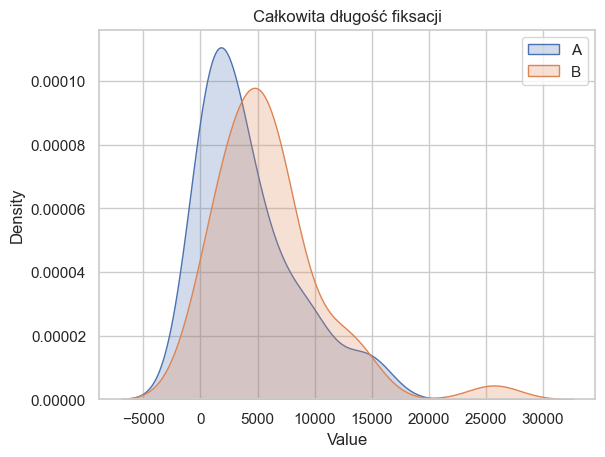

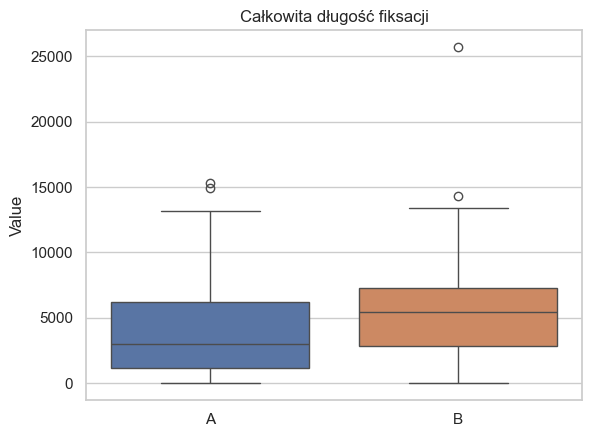

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


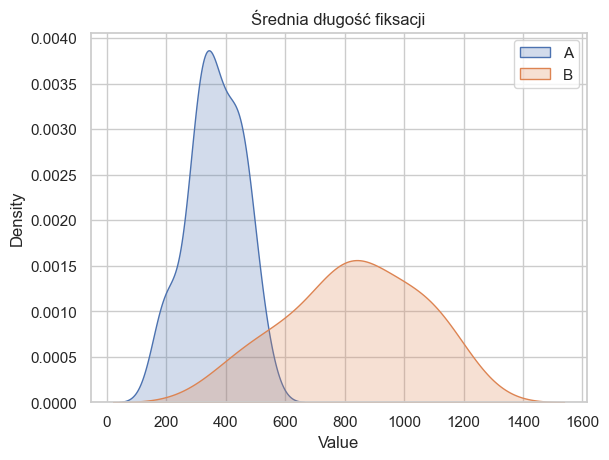

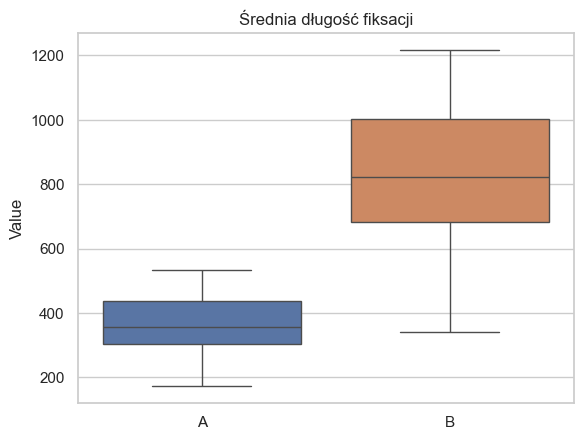

Bez polecenia:


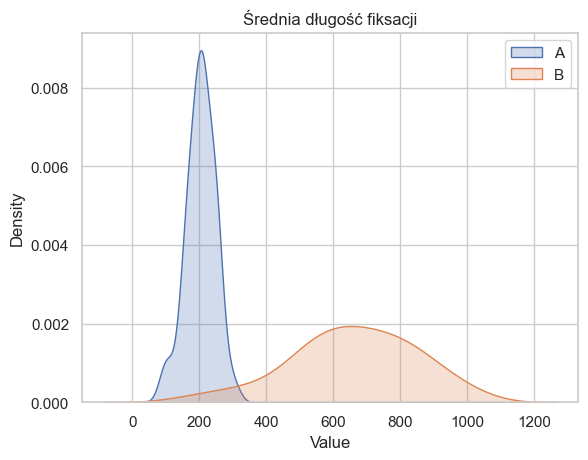

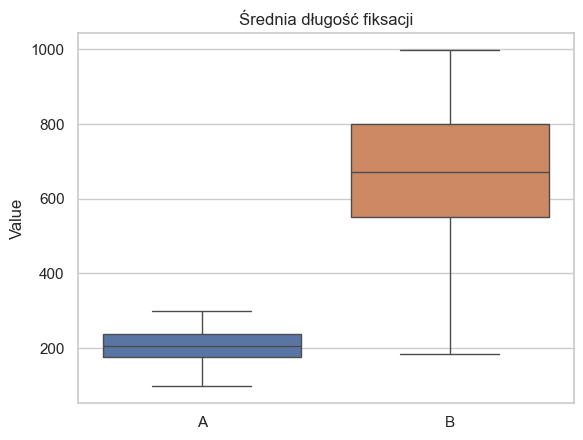

Tylko polecenie:


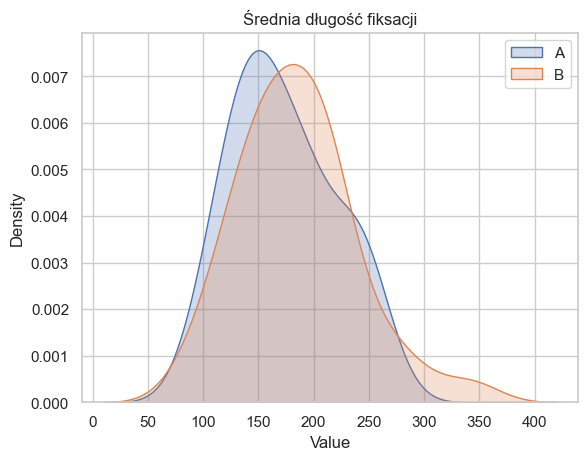

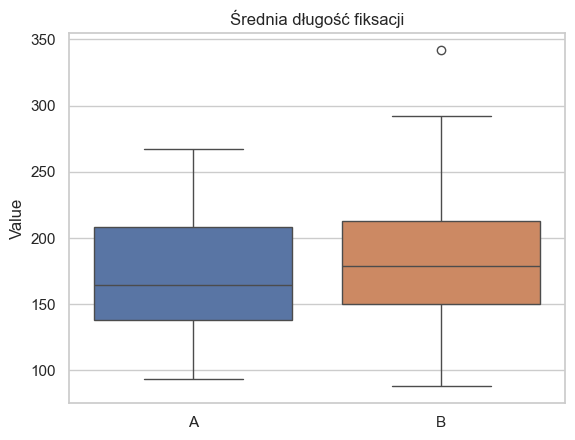

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


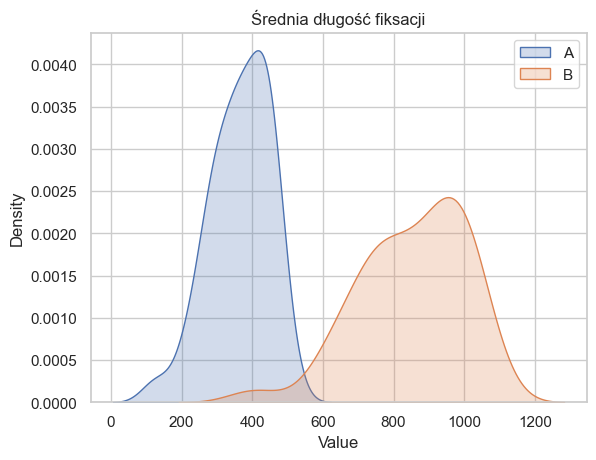

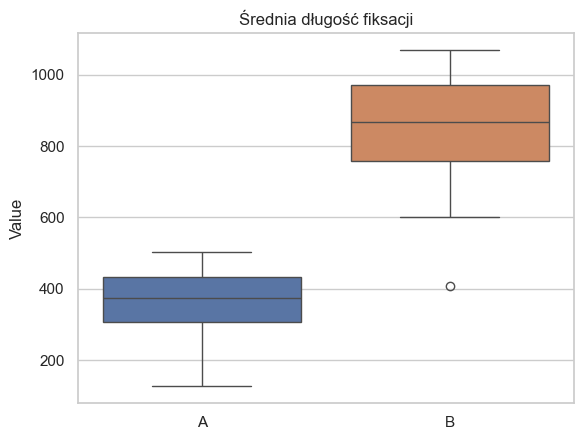

Bez polecenia:


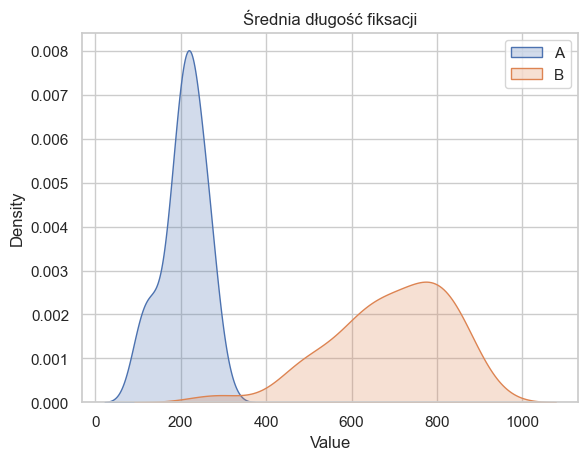

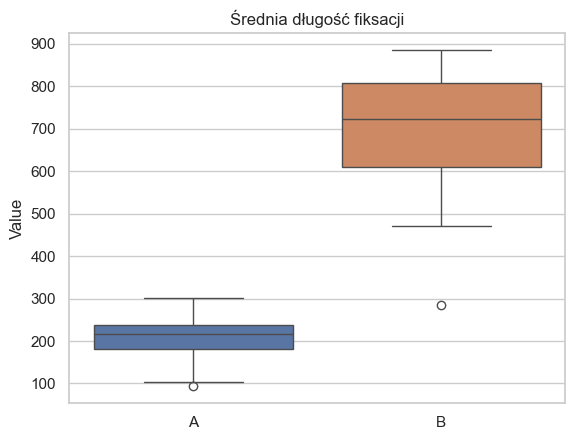

Tylko polecenie:


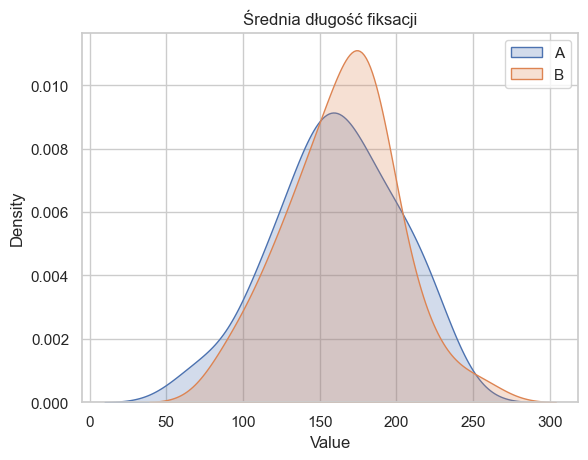

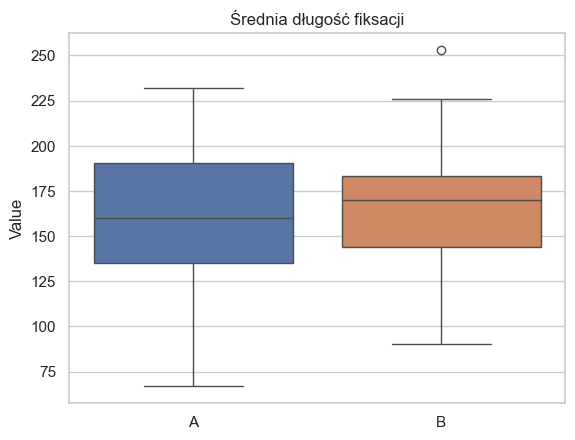

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


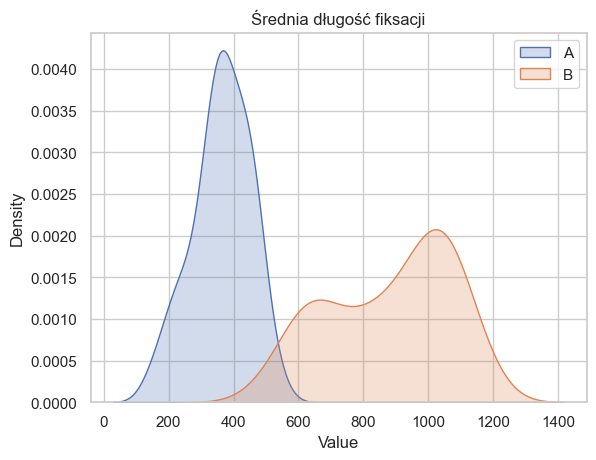

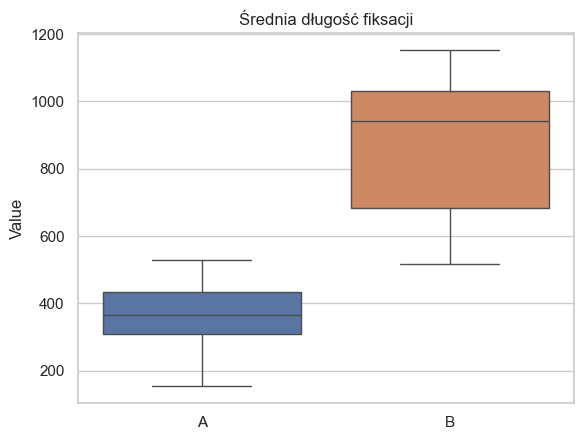

Bez polecenia:


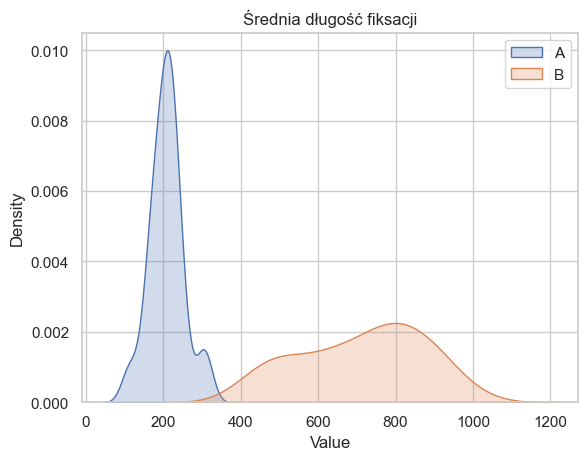

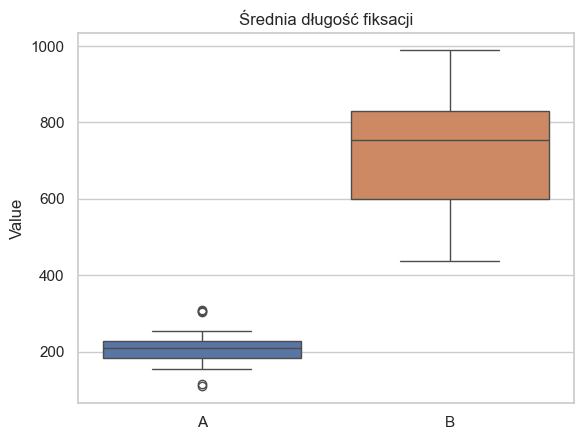

Tylko polecenie:


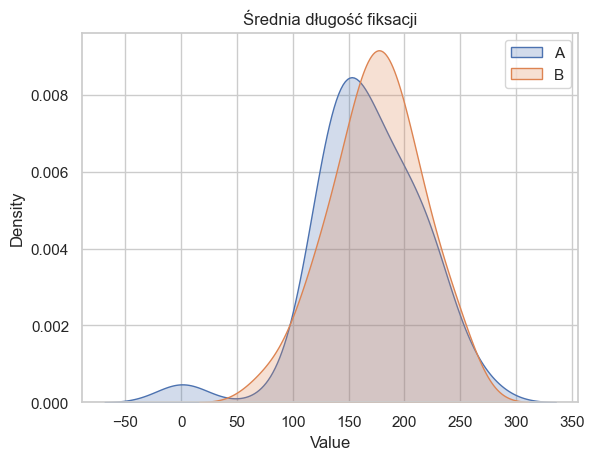

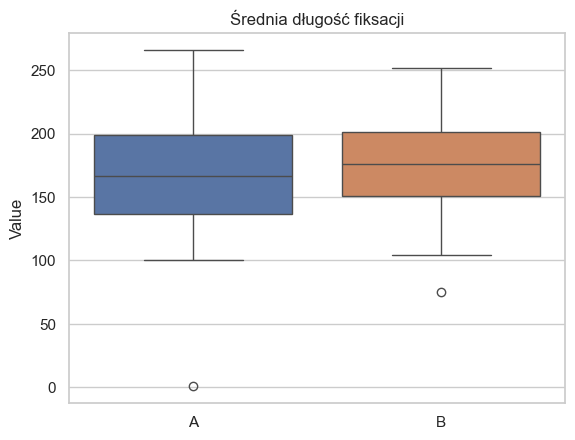

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


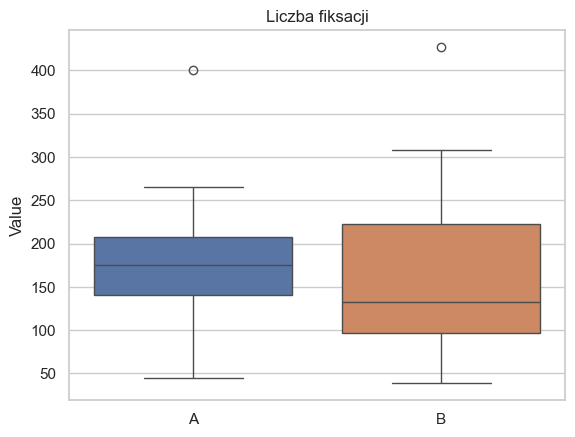

Bez polecenia:


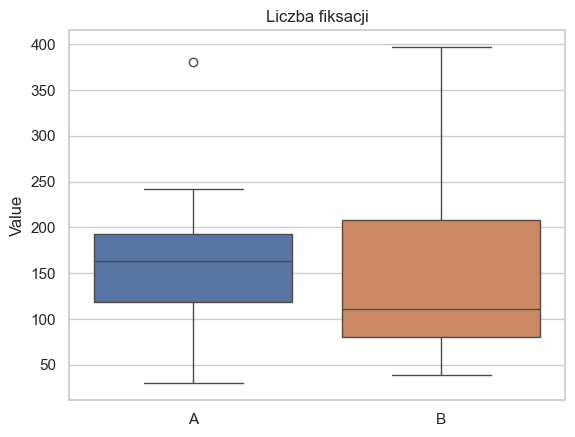

Tylko polecenie:


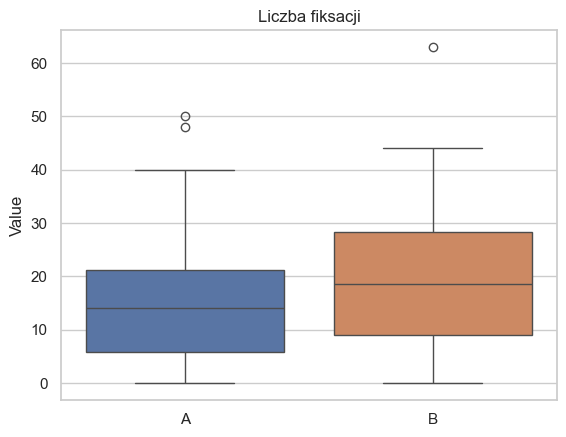

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


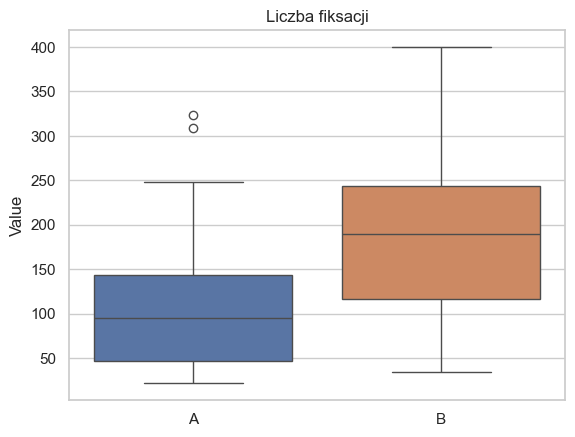

Bez polecenia:


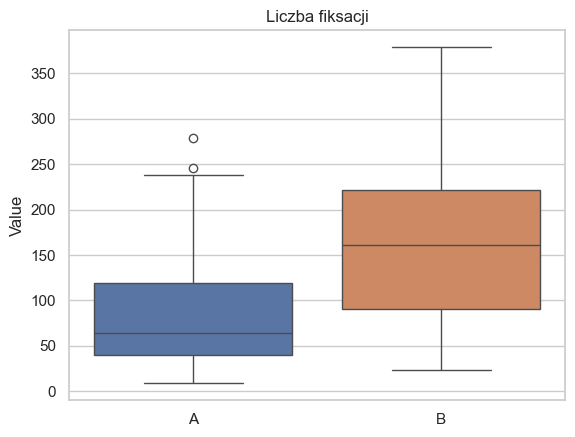

Tylko polecenie:


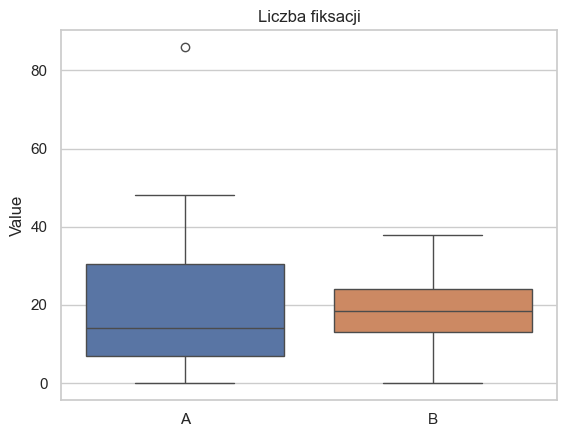

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


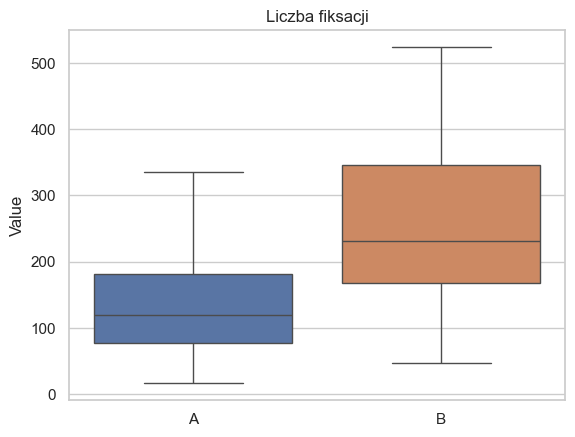

Bez polecenia:


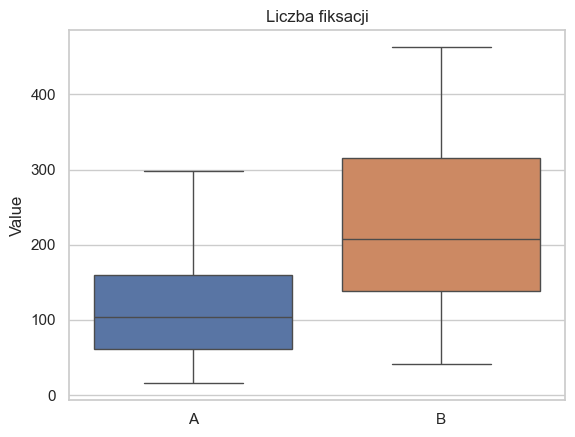

Tylko polecenie:


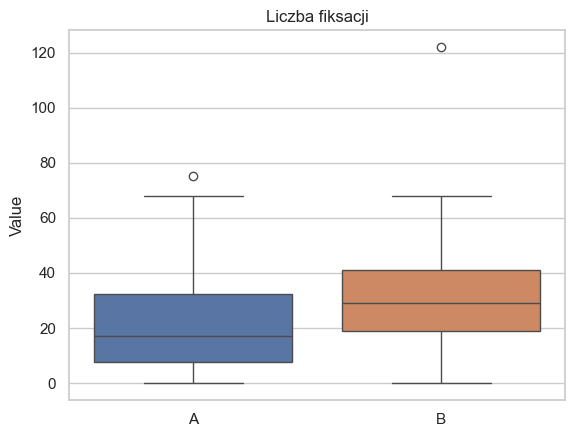

In [26]:
# A vs B
var = 'Total'
title = 'Całkowita długość fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Avg'
title = 'Średnia długość fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Num'
title = 'Liczba fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)

Wykresy - wizyty

TOTAL
Z poleceniem:


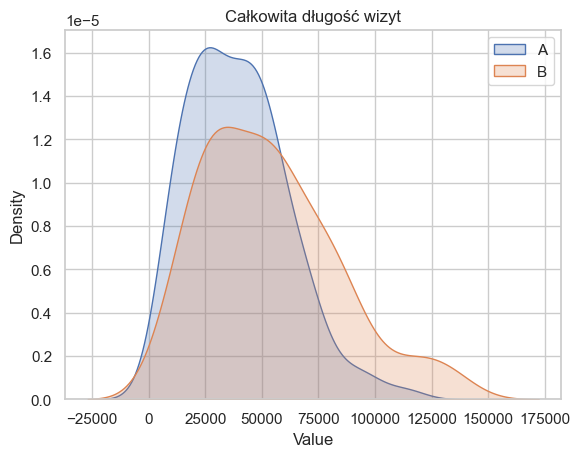

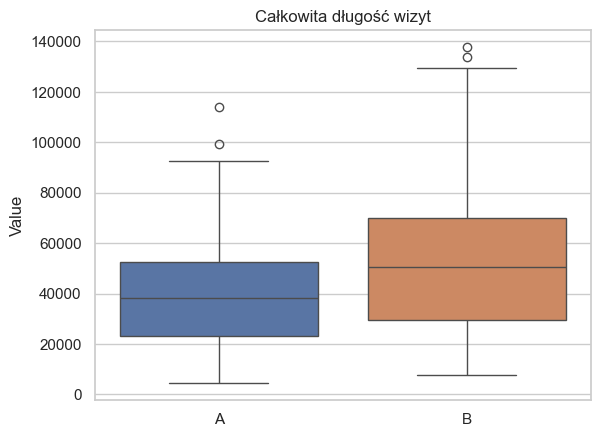

Bez polecenia:


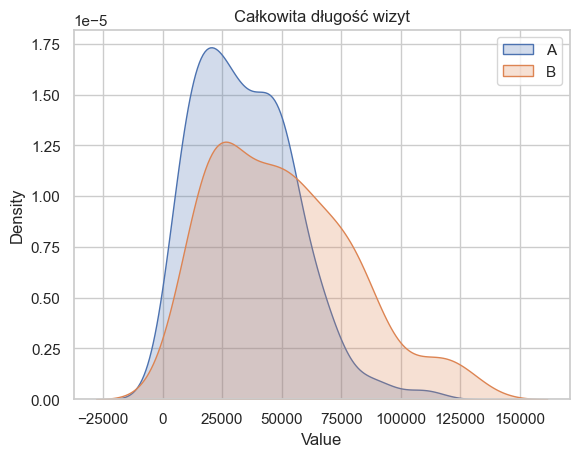

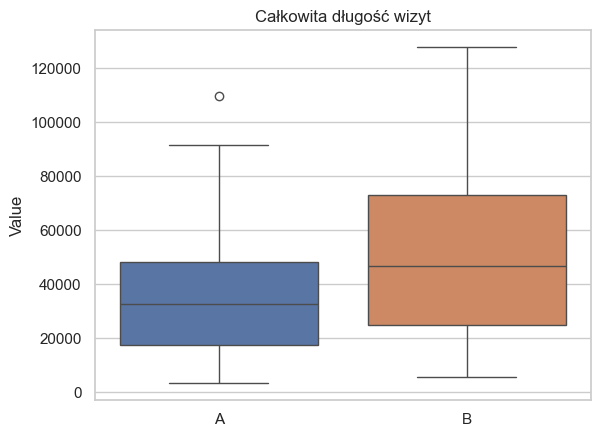

Tylko polecenie:


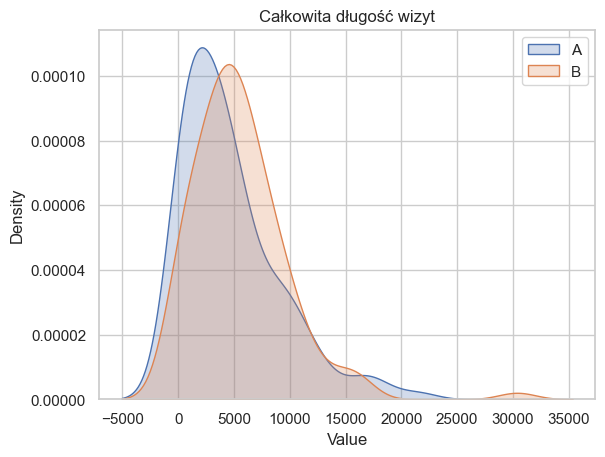

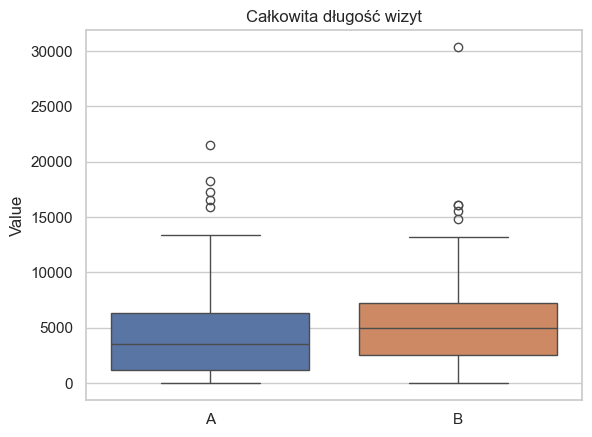

------------------------------------------
AVG
Z poleceniem:


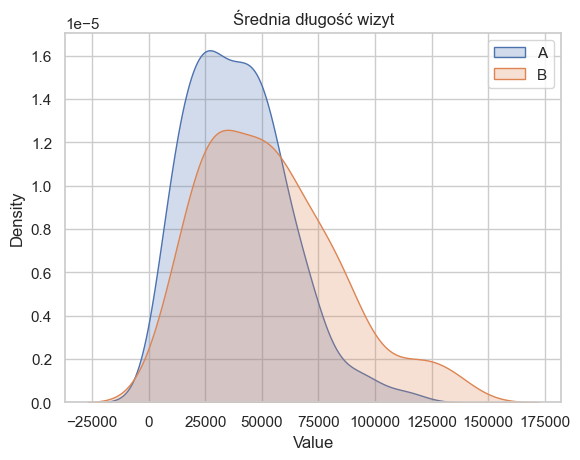

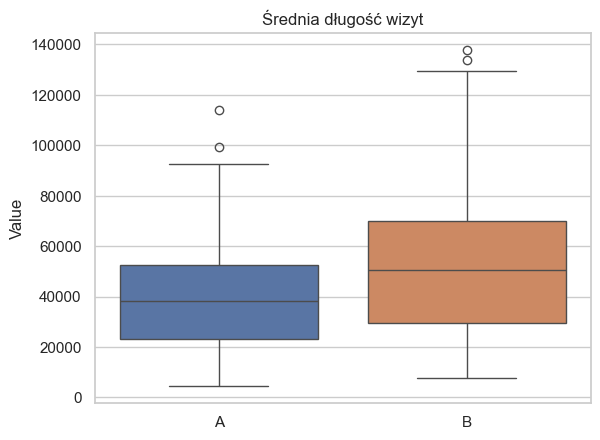

Bez polecenia:


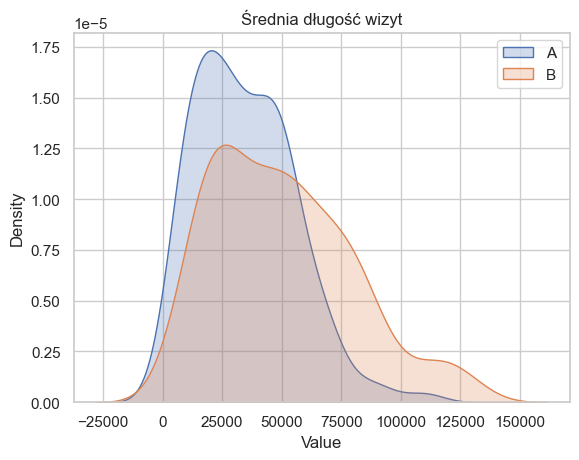

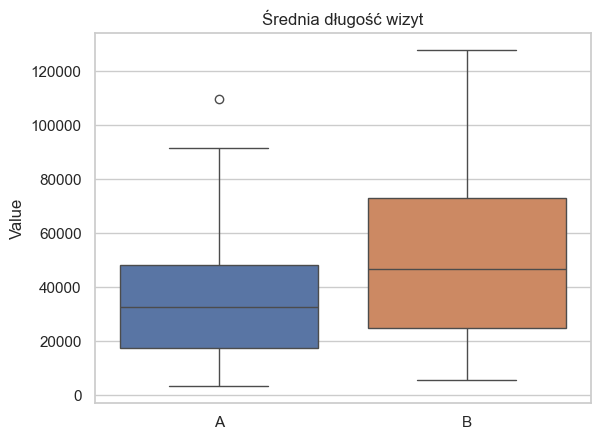

Tylko polecenie:


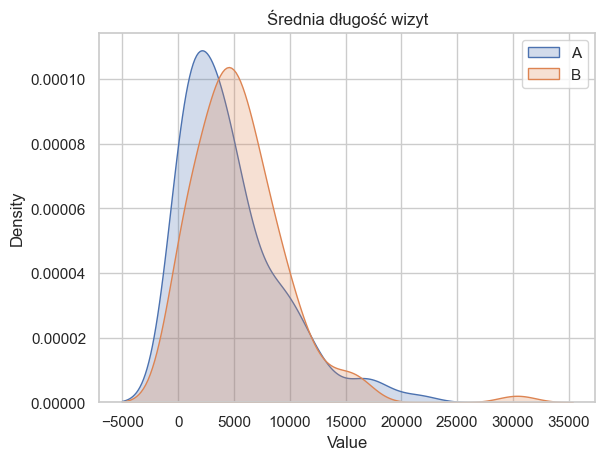

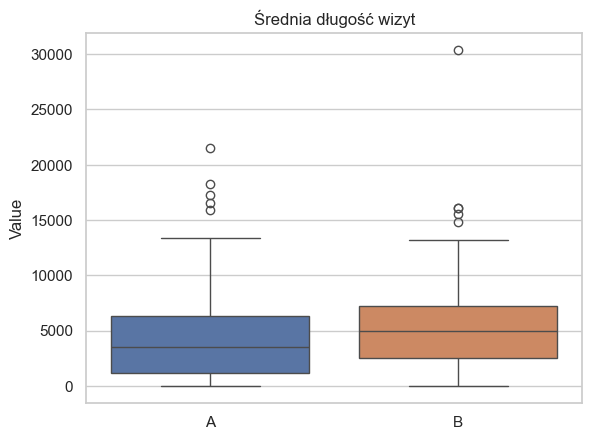

------------------------------------------
NUM
Z poleceniem:


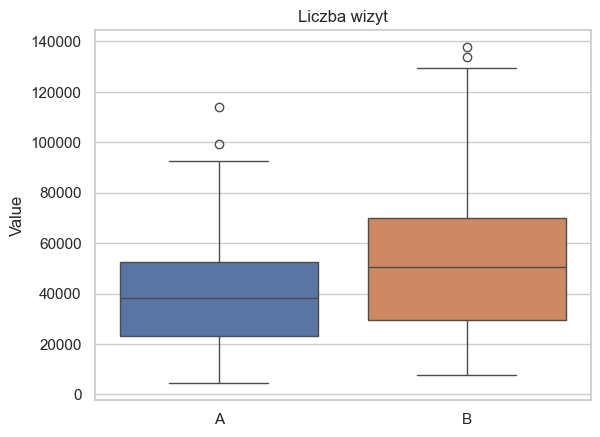

Bez polecenia:


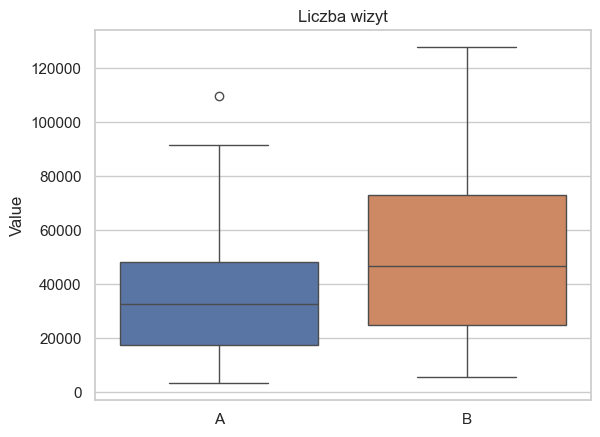

Tylko polecenie:


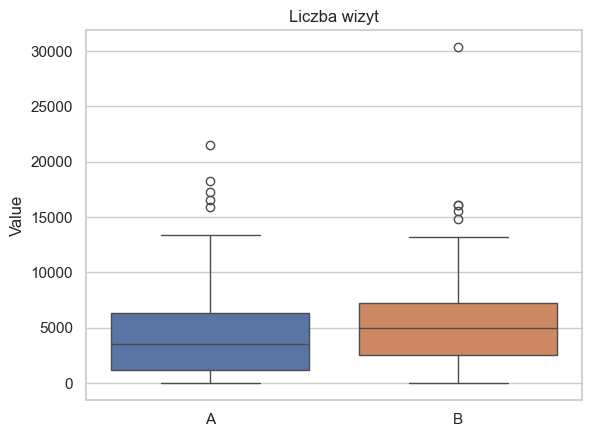

In [27]:
# kolekcje
var = 'Total'
title = 'Całkowita długość wizyt'
print('TOTAL')
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
title = 'Średnia długość wizyt'
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
title = 'Liczba wizyt'
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

TOTAL
Z poleceniem:


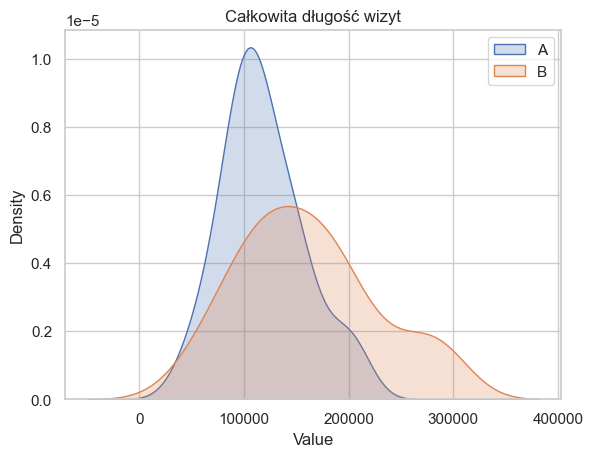

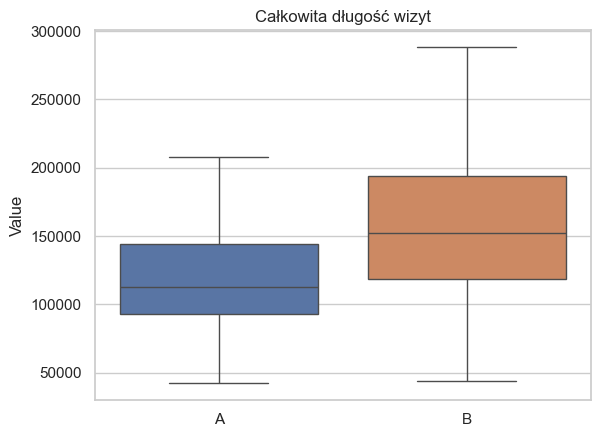

Bez polecenia:


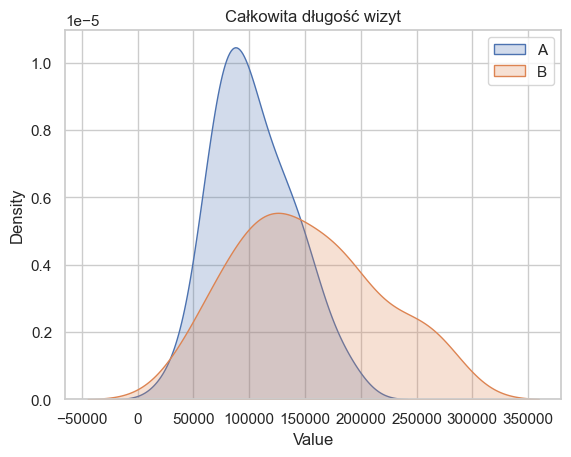

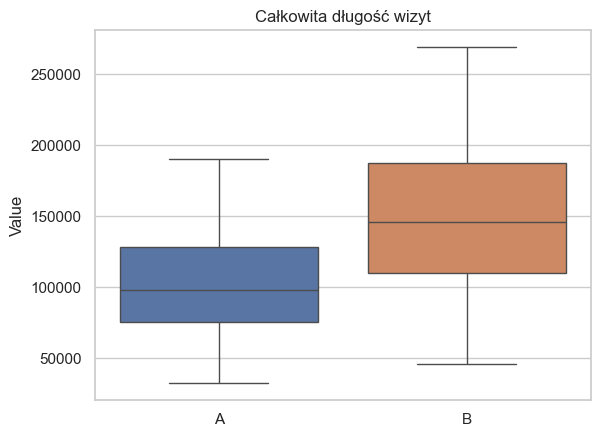

Tylko polecenie:


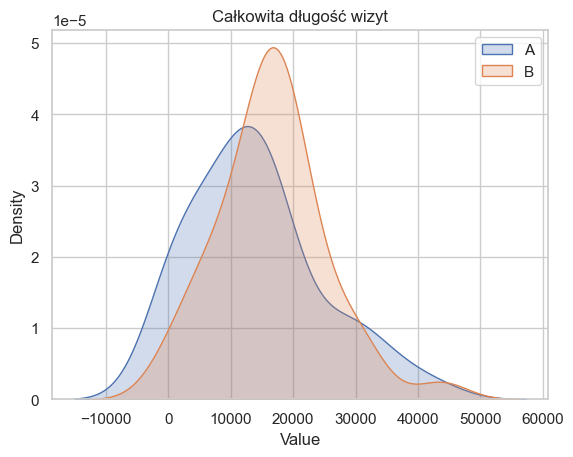

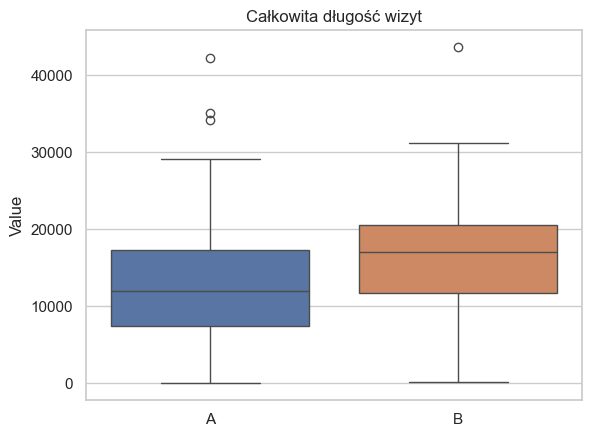

------------------------------------------
AVG
Z poleceniem:


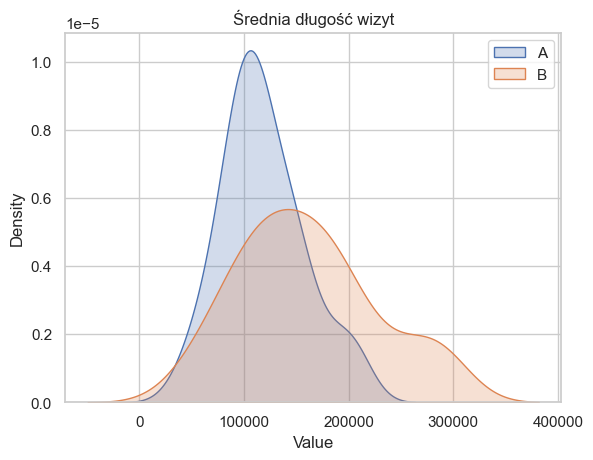

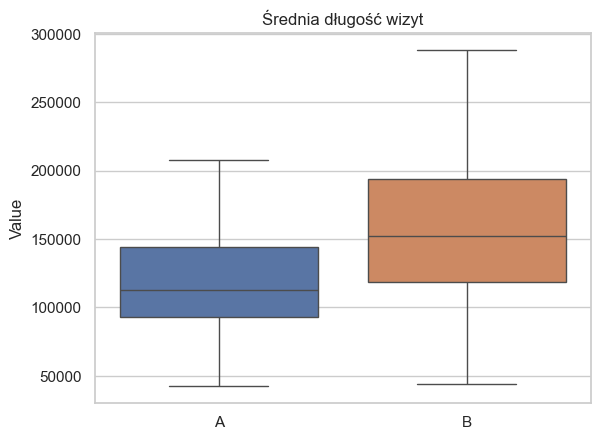

Bez polecenia:


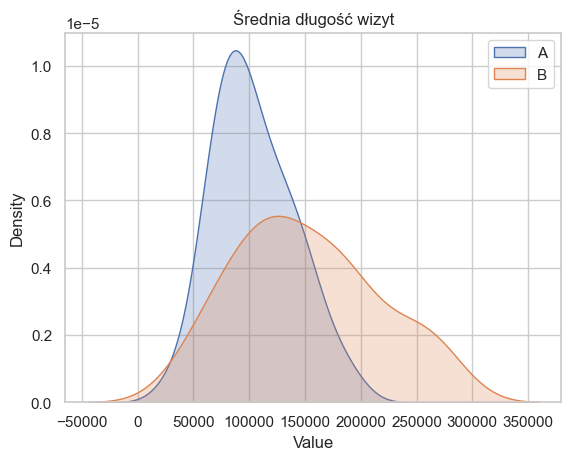

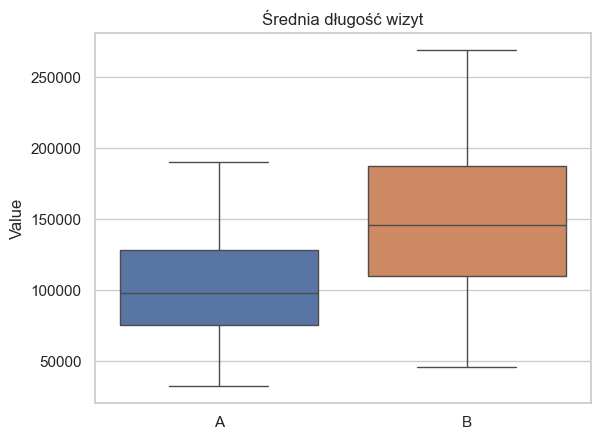

Tylko polecenie:


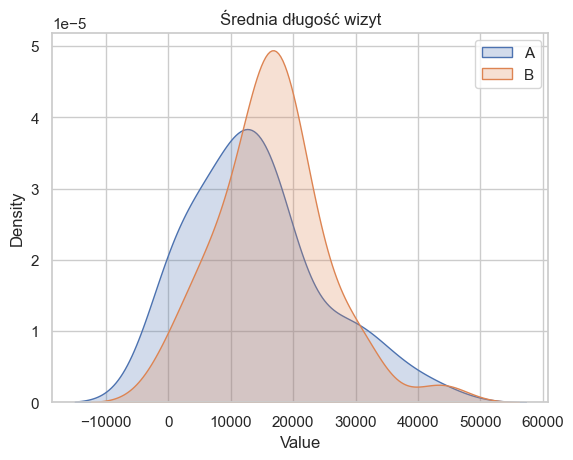

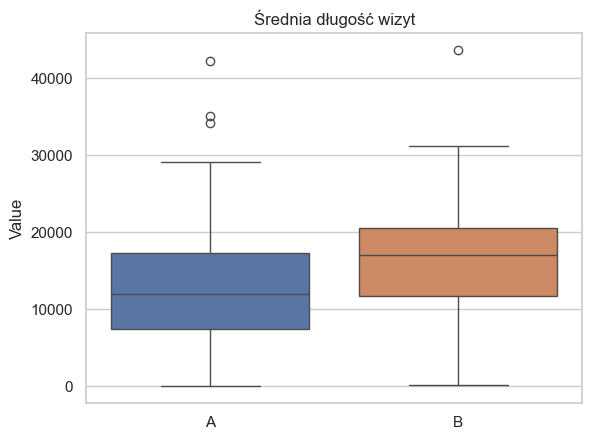

------------------------------------------
NUM
Z poleceniem:


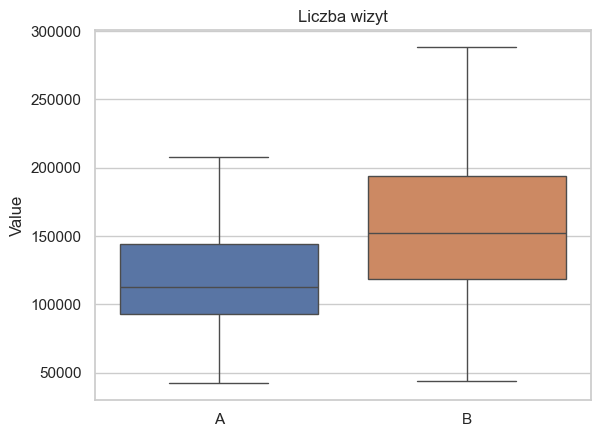

Bez polecenia:


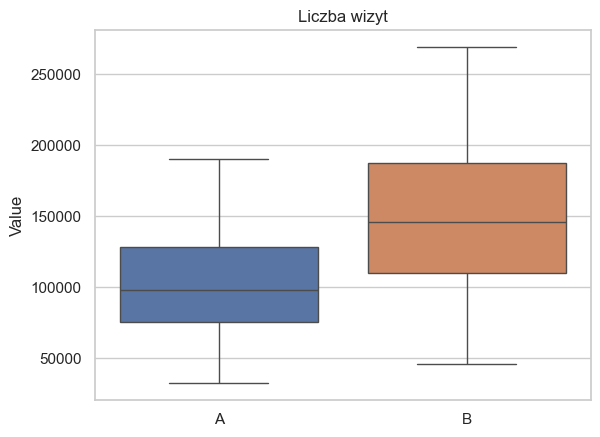

Tylko polecenie:


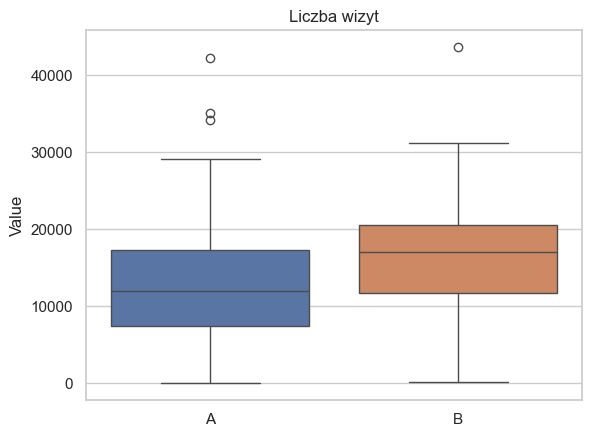

In [28]:
# sumy
var = 'Total'
title = 'Całkowita długość wizyt'
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
title = 'Średnia długość wizyt'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
title = 'Liczba wizyt'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


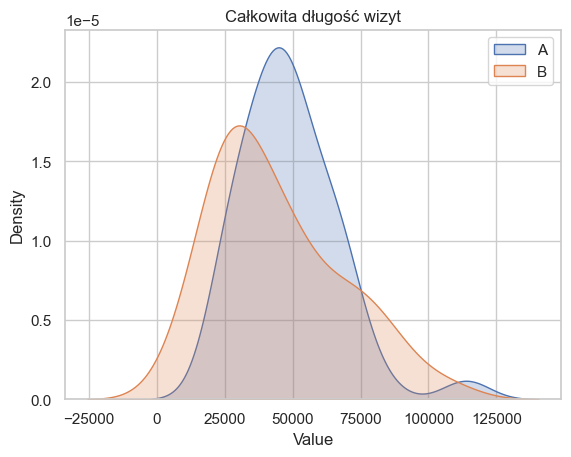

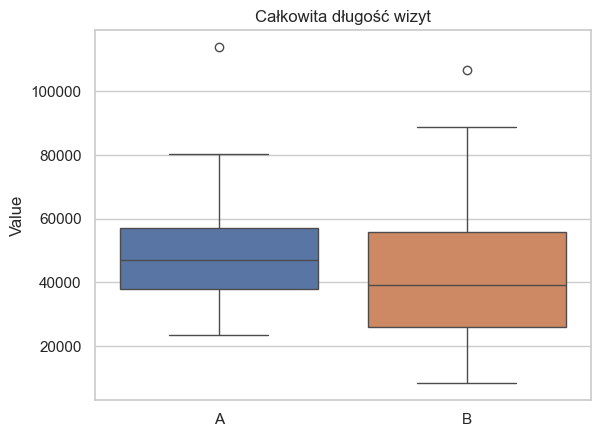

Bez polecenia:


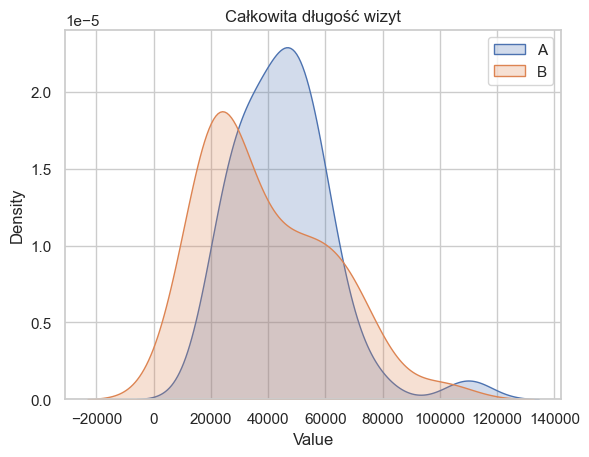

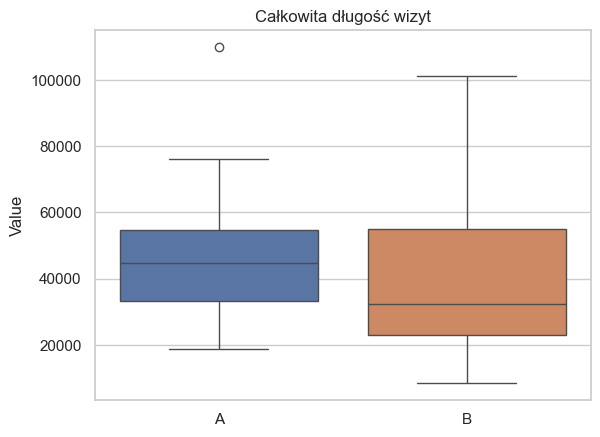

Tylko polecenie:


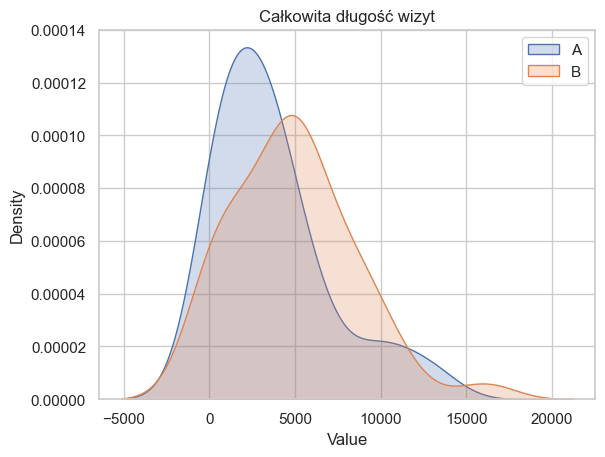

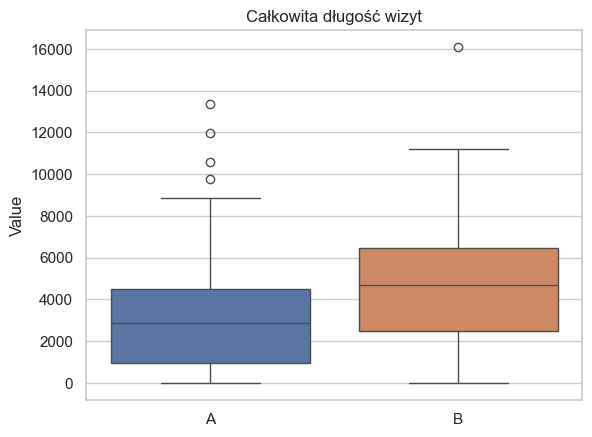

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


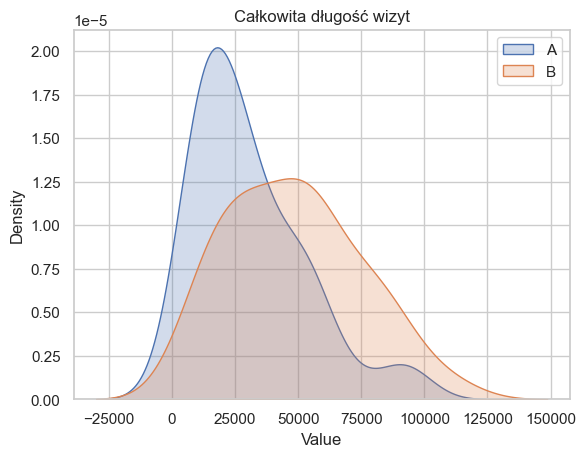

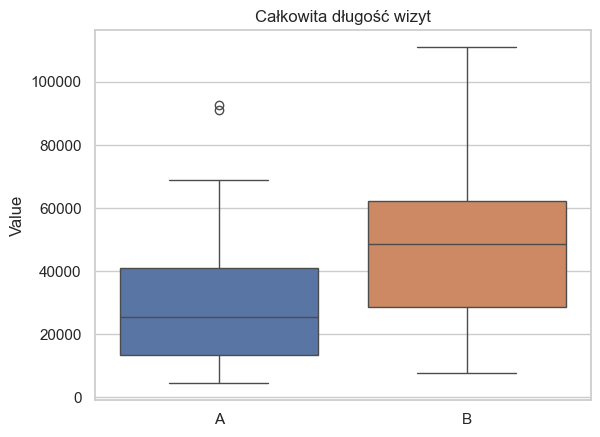

Bez polecenia:


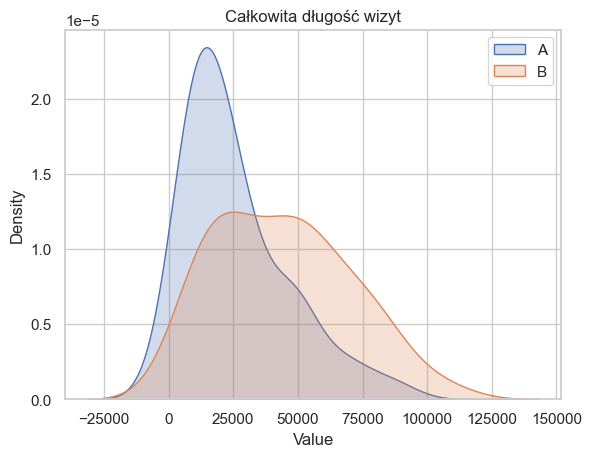

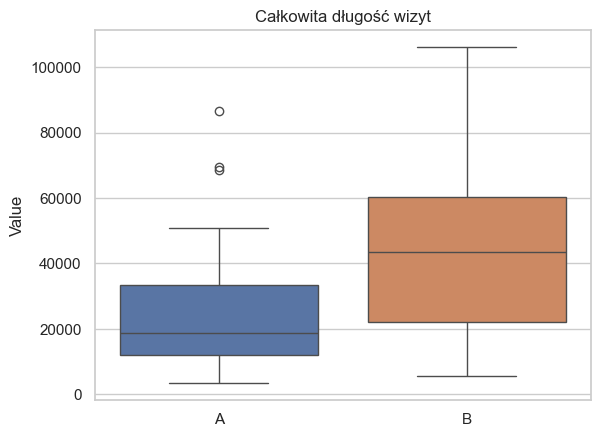

Tylko polecenie:


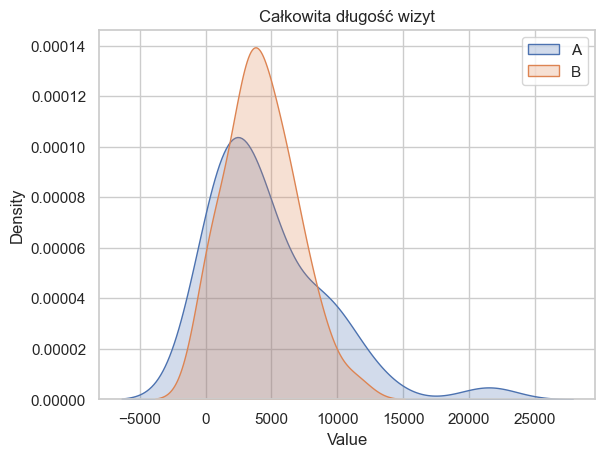

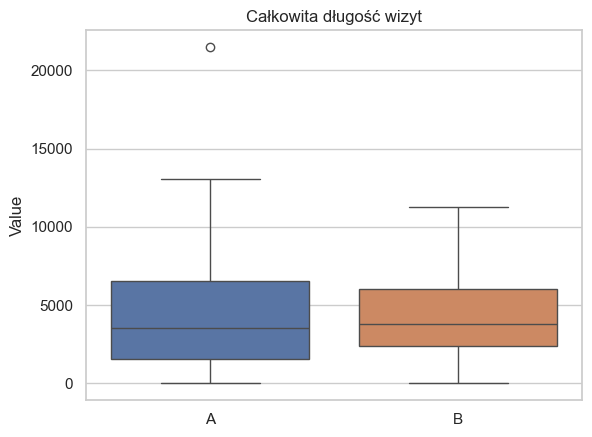

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


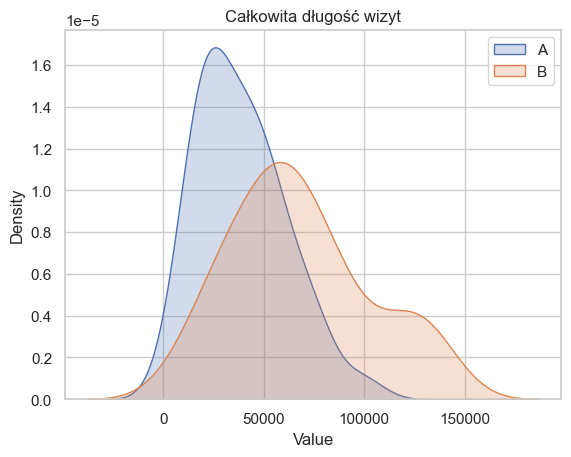

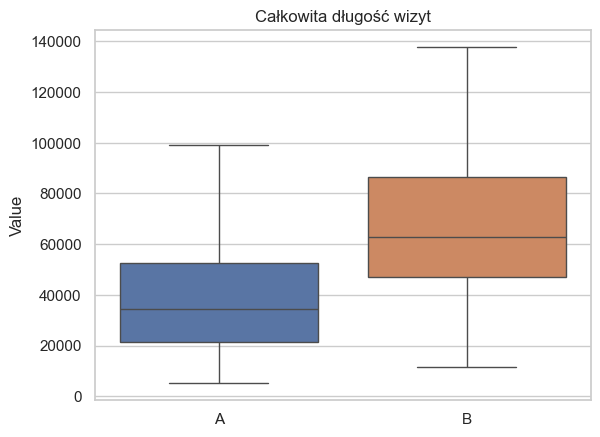

Bez polecenia:


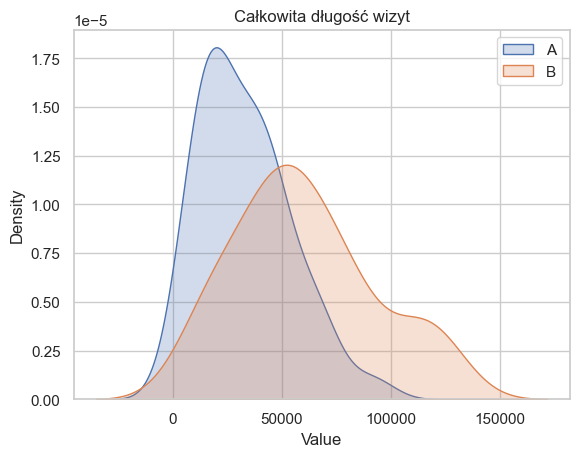

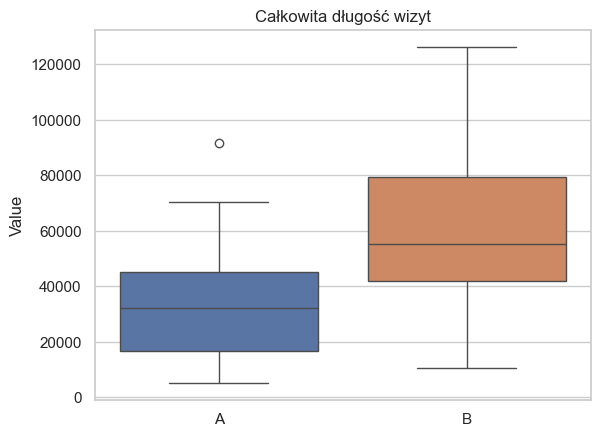

Tylko polecenie:


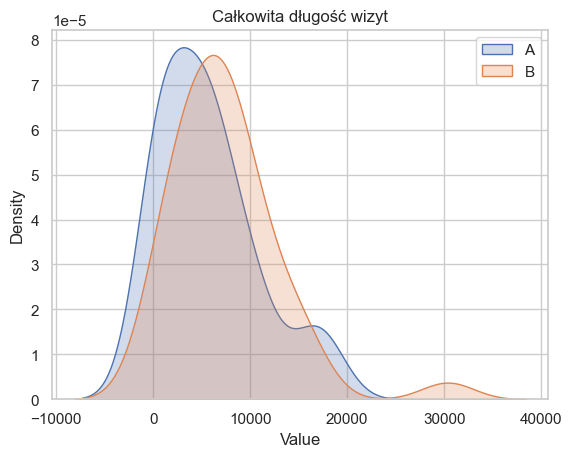

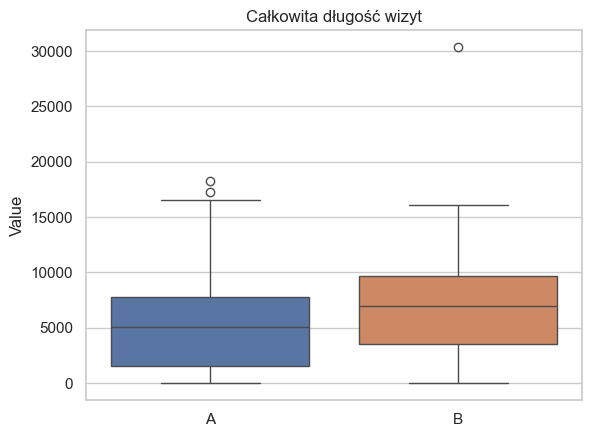

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


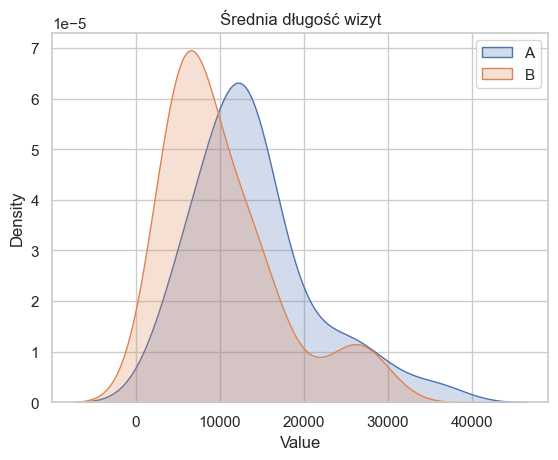

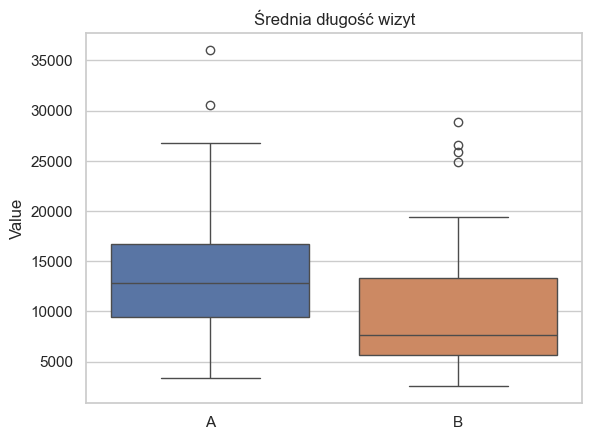

Bez polecenia:


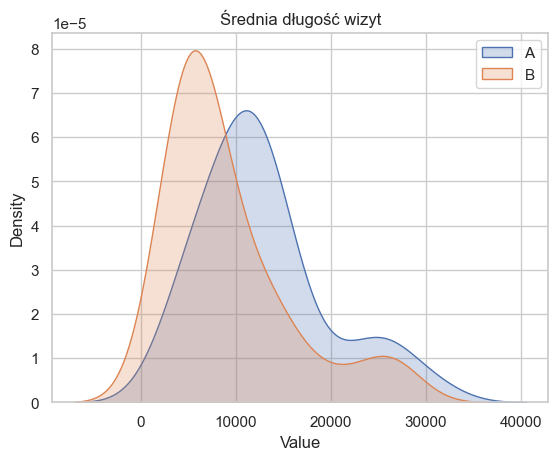

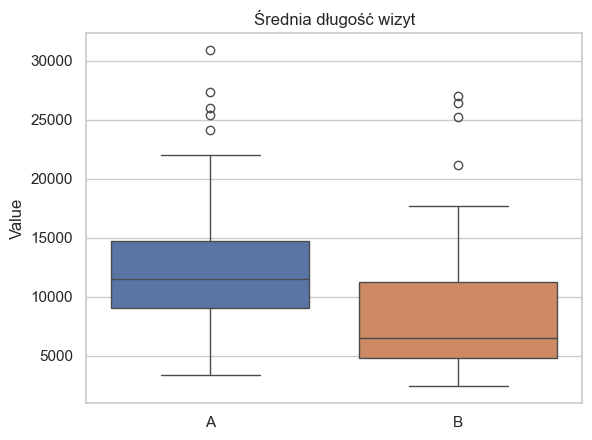

Tylko polecenie:


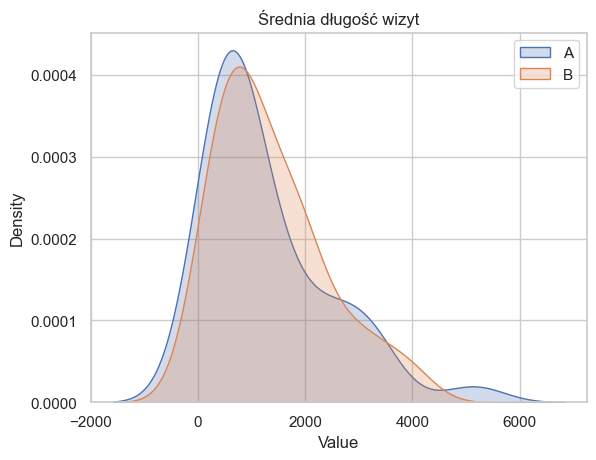

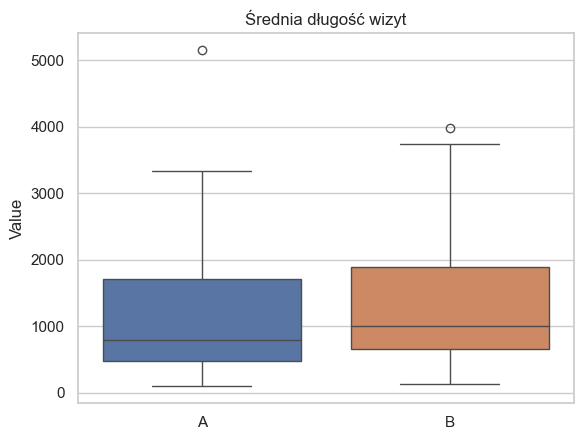

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


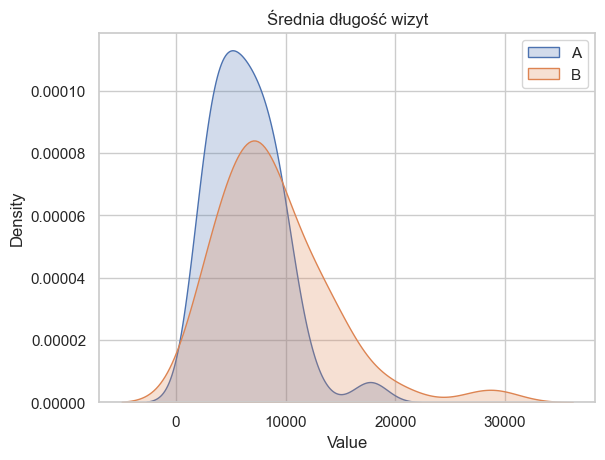

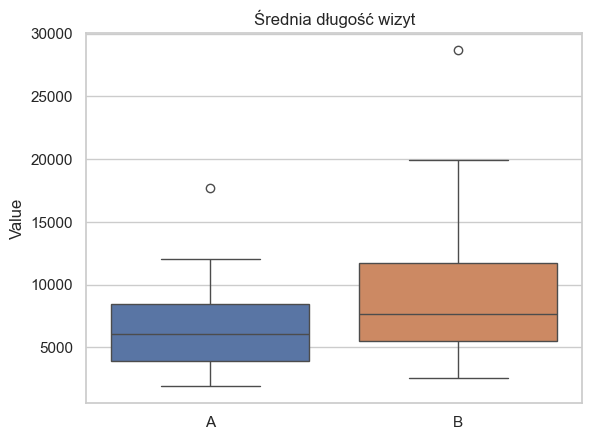

Bez polecenia:


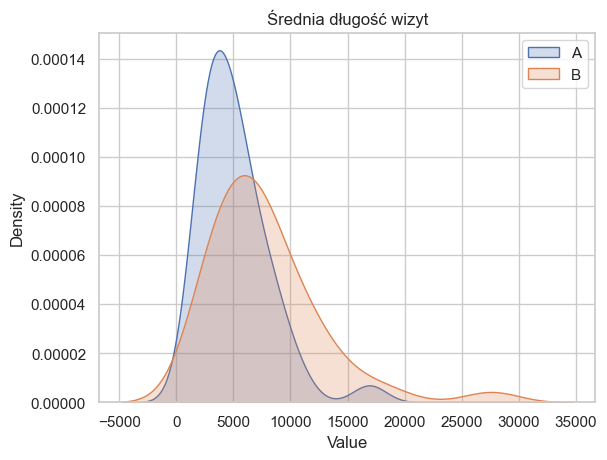

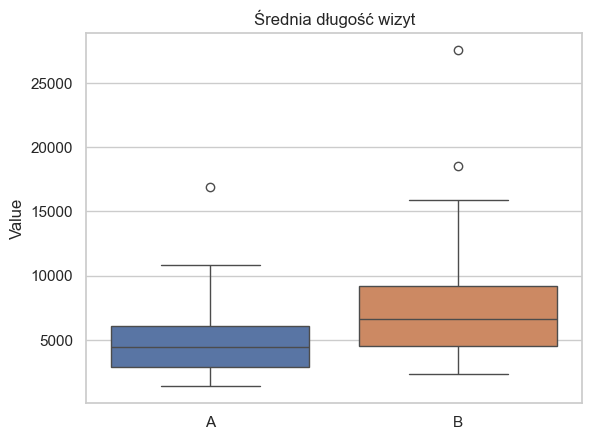

Tylko polecenie:


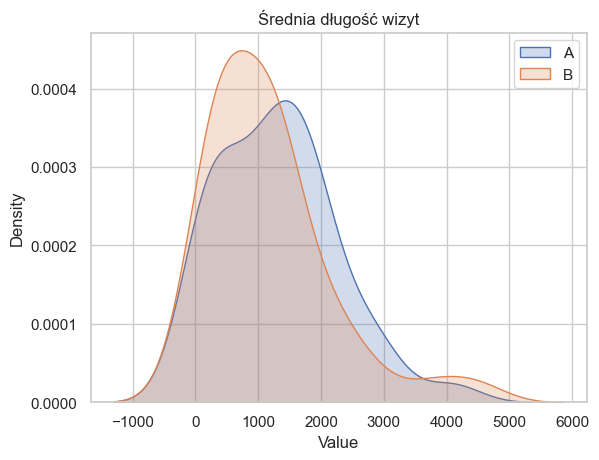

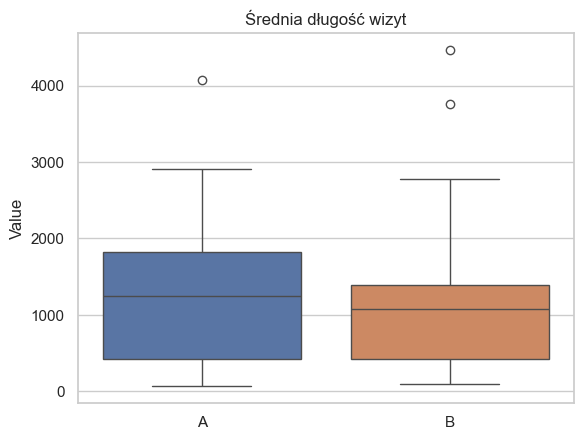

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


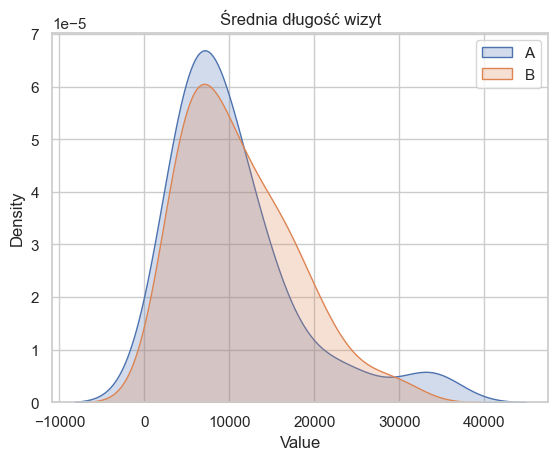

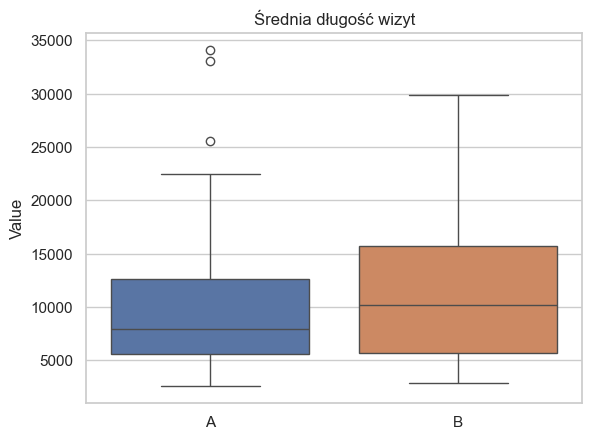

Bez polecenia:


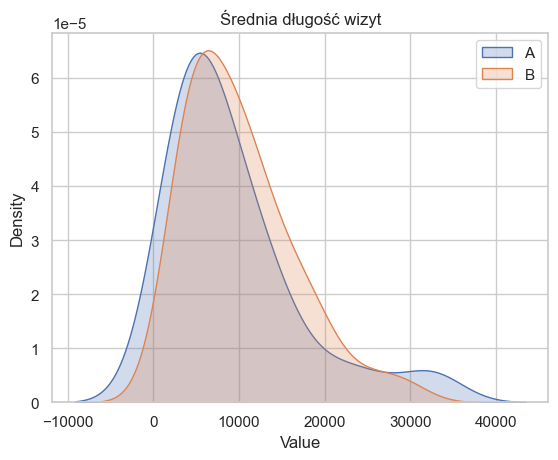

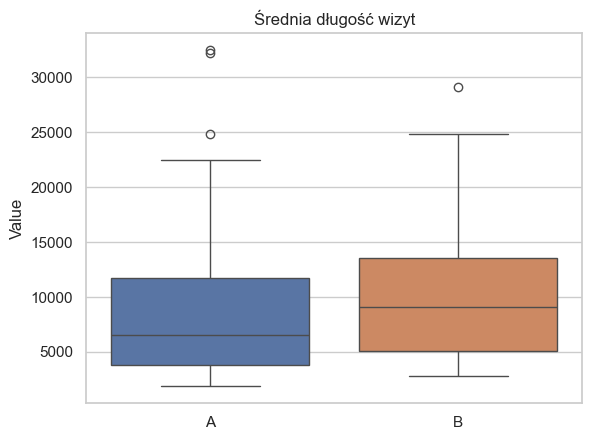

Tylko polecenie:


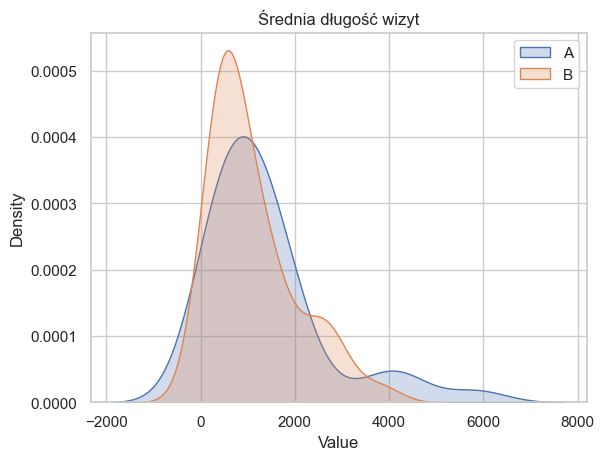

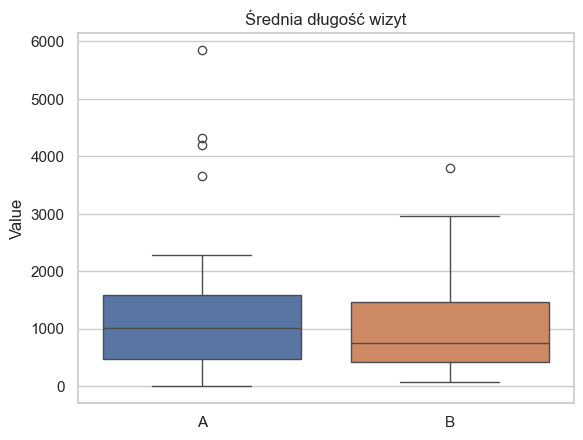

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


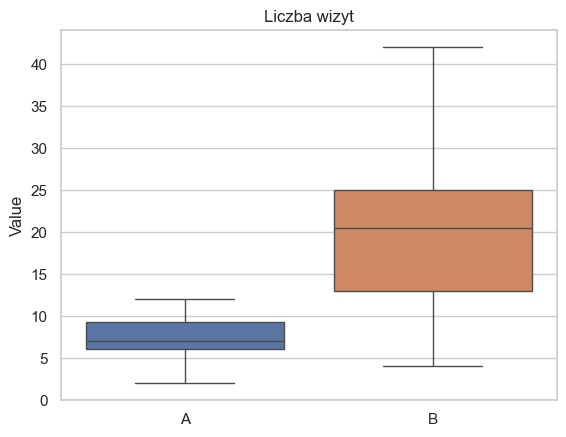

Bez polecenia:


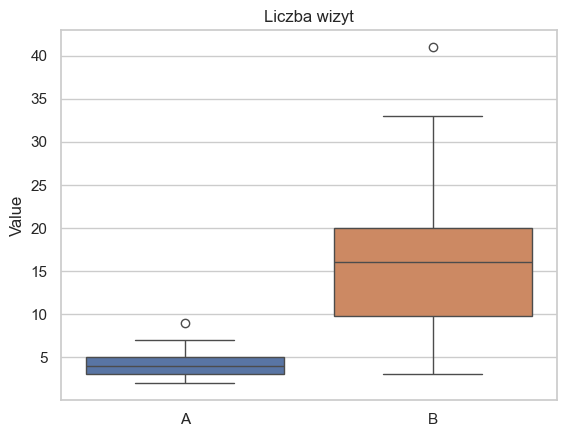

Tylko polecenie:


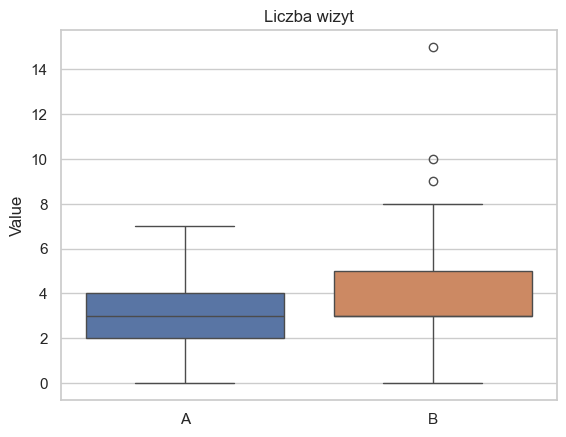

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


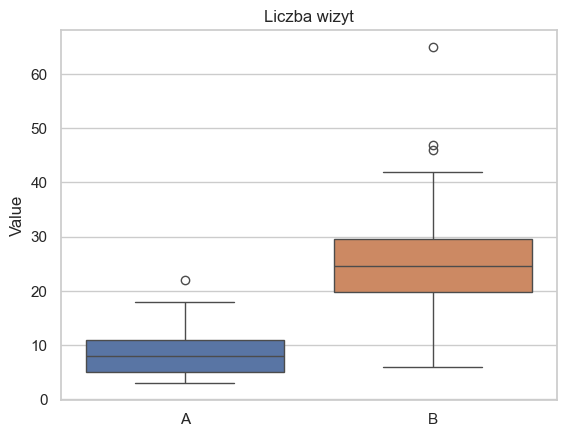

Bez polecenia:


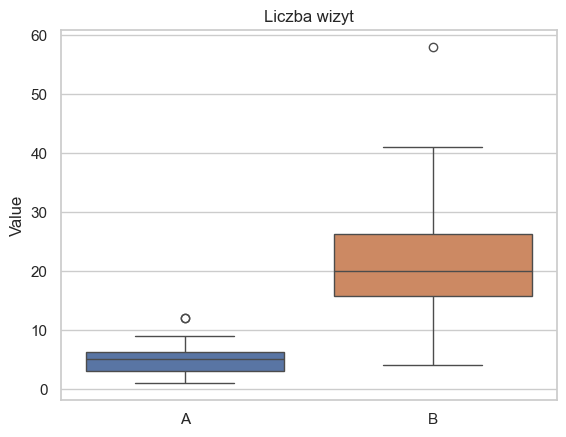

Tylko polecenie:


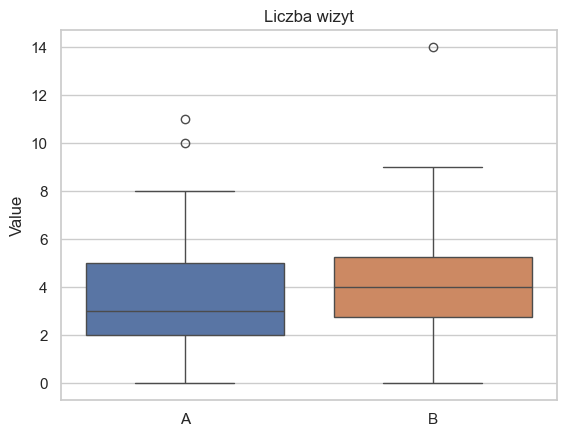

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


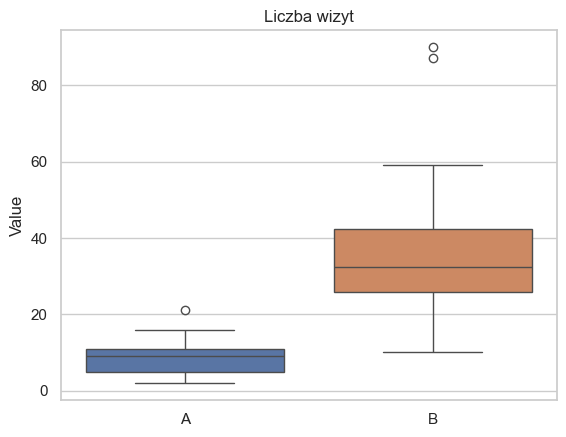

Bez polecenia:


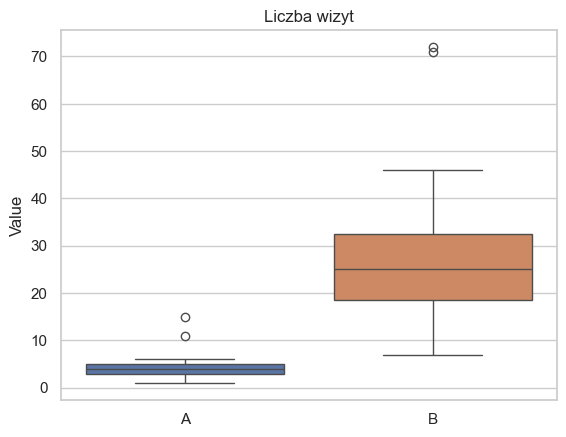

Tylko polecenie:


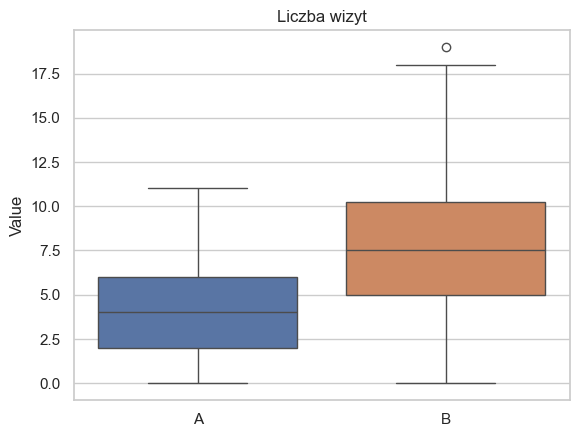

In [29]:
# A vs B
var = 'Total'
title = 'Całkowita długość wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Avg'
title = 'Średnia długość wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Num'
title = 'Liczba wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0], groups[1], title=title)